# PART - ONE

<b>DOMAIN: </b> Automobile

<b> CONTEXT: </b> The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

<b>DATA DESCRIPTION: </b> The data concerns city-cycle fuel consumption in miles per gallon
<br>

• Attribute Information:
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

<b> PROJECT OBJECTIVE:  </b> Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’

<b> Steps and tasks: </b>
<br>
##### 1. Import and warehouse data: 
• Import all the given datasets and explore shape and size.
<br>
• Merge all datasets onto one and explore final shape and size.
<br>
• Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.
<br>
• Import the data from above steps into python.

In [72]:
# all imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import time
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.utils import resample

#clustering related
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [73]:
data_auto_1 = pd.read_csv("Part1 - Car name.csv")
data_auto_1.shape,data_auto_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
car_name    398 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


((398, 1), None)

In [74]:
data_auto_2 = pd.read_json("Part1 - Car-Attributes.json")
data_auto_2.shape,data_auto_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
acc       398 non-null float64
cyl       398 non-null int64
disp      398 non-null float64
hp        398 non-null object
mpg       398 non-null float64
origin    398 non-null int64
wt        398 non-null int64
yr        398 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


((398, 8), None)

In [75]:
# Total 398 records
# Concatenate datasets

data_auto =  pd.concat([data_auto_1,data_auto_2],axis = 1)
data_auto.shape

(398, 9)

In [76]:
# 398 rows and 9 columns
data_auto.drop_duplicates(inplace=True)
data_auto.shape

(398, 9)

In [77]:
# Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.
data_auto.to_csv('car_concatenated.csv',index=False)
data_auto.to_excel('car_concatenated.xlsx',index=False)
data_auto.to_json('car_concatenated.json')

In [78]:
#Import the data from above steps into python.
data = pd.read_csv("car_concatenated.csv")
data.shape

(398, 9)

In [79]:
#Import the data from above steps into python.
data = pd.read_json("car_concatenated.json")
data.shape

(398, 9)

In [80]:
#Import the data from above steps into python.
data = pd.read_excel("car_concatenated.xlsx")
data.shape

(398, 9)

<b>2. Data cleansing: </b>
<br>
• Missing/incorrect value treatment
<br>
• Drop attribute/s if required using relevant functional knowledge
<br>
• Perform another kind of corrections/treatment on the data.

In [18]:
data.sample(10)

car_name   acc  cyl   disp   hp   mpg  origin    wt  yr
392     chevrolet camaro  17.3    4  151.0   90  27.0       1  2950  82
107          amc gremlin  15.0    6  232.0  100  18.0       1  2789  73
122            saab 99le  14.0    4  121.0  110  24.0       2  2660  73
145           datsun 710  19.0    4   83.0   61  32.0       3  2003  74
331            subaru dl  18.0    4   97.0   67  33.8       3  2145  80
121    dodge dart custom  11.0    8  318.0  150  15.0       1  3399  73
10   dodge challenger se  10.0    8  383.0  170  15.0       1  3563  70
177           audi 100ls  15.0    4  115.0   95  23.0       2  2694  75
316          dodge aspen  18.7    6  225.0   90  19.1       1  3381  80
141             audi fox  16.5    4   98.0   83  29.0       2  2219  74

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
car_name    398 non-null object
acc         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
mpg         398 non-null float64
origin      398 non-null int64
wt          398 non-null int64
yr          398 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [82]:
#hp is continous variable but stored as object.
data['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [83]:
data['hp'].replace(to_replace='?',value=np.nan,inplace=True)
data['hp']=pd.to_numeric(data['hp'])
data['hp'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
car_name    398 non-null object
acc         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
mpg         398 non-null float64
origin      398 non-null int64
wt          398 non-null int64
yr          398 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [85]:
# There are 6 null values in column 'hp'
data.corr()

acc       cyl      disp        hp       mpg    origin        wt  \
acc     1.000000 -0.505419 -0.543684 -0.689196  0.420289  0.205873 -0.417457   
cyl    -0.505419  1.000000  0.950721  0.842983 -0.775396 -0.562543  0.896017   
disp   -0.543684  0.950721  1.000000  0.897257 -0.804203 -0.609409  0.932824   
hp     -0.689196  0.842983  0.897257  1.000000 -0.778427 -0.455171  0.864538   
mpg     0.420289 -0.775396 -0.804203 -0.778427  1.000000  0.563450 -0.831741   
origin  0.205873 -0.562543 -0.609409 -0.455171  0.563450  1.000000 -0.581024   
wt     -0.417457  0.896017  0.932824  0.864538 -0.831741 -0.581024  1.000000   
yr      0.288137 -0.348746 -0.370164 -0.416361  0.579267  0.180662 -0.306564   

              yr  
acc     0.288137  
cyl    -0.348746  
disp   -0.370164  
hp     -0.416361  
mpg     0.579267  
origin  0.180662  
wt     -0.306564  
yr      1.000000

In [86]:
data[data['hp'].isnull()]

car_name   acc  cyl   disp  hp   mpg  origin    wt  yr
32             ford pinto  19.0    4   98.0 NaN  25.0       1  2046  71
126         ford maverick  17.0    6  200.0 NaN  21.0       1  2875  74
330  renault lecar deluxe  17.3    4   85.0 NaN  40.9       2  1835  80
336    ford mustang cobra  14.3    4  140.0 NaN  23.6       1  2905  80
354           renault 18i  15.8    4  100.0 NaN  34.5       2  2320  81
374        amc concord dl  20.5    4  151.0 NaN  23.0       1  3035  82

In [87]:
#'hp' has high positive correlation with 'cyl','disp','wt' and high negative correlation with 'acc','mpg'
# Lets use linear regression to fill up nulls in hp.
# build a linear model where hp = a*disp + c

temp = data.copy() # copy data to a new dataframe

temp.dropna(inplace=True) # drop those values that has null in hp
temp.shape # check shape

(392, 9)

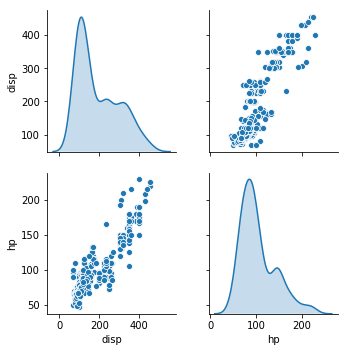

In [88]:
sns.pairplot(data[['disp','hp']], diag_kind= 'kde')

In [89]:
# Relationship between 'disp'and 'hp' looks linear

# the independent variable
X = temp[['disp']]

# the dependent variable
y = temp[['hp']]

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

#get co-efficient of 'disp'
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
#get intercept    
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

#check accuracy of train and test
train_accuracy=regression_model.score(X_train, y_train)
test_accuracy=regression_model.score(X_test, y_test)
train_accuracy,test_accuracy

The coefficient for disp is 0.3265743931986037
The intercept for our model is 41.29017640659455


(0.7848720108303036, 0.845138610345033)

In [90]:
# get index of rows where 'hp' in null
index=data[data['hp'].isnull()].index
index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [91]:
# take a copy of data before impute.

p_data = data.copy()

#get column numbers
col_hp = p_data.columns.get_loc('hp')
col_disp = p_data.columns.get_loc('disp')

# apply linear regression model to rows that have 'hp' as null
for i in index:
    p_data.iloc[i,col_hp] = round(0.33 * p_data.iloc[i,col_disp] + 41.29,0)

In [92]:
p_data.corr()

acc       cyl      disp        hp       mpg    origin        wt  \
acc     1.000000 -0.505419 -0.543684 -0.687256  0.420289  0.205873 -0.417457   
cyl    -0.505419  1.000000  0.950721  0.843580 -0.775396 -0.562543  0.896017   
disp   -0.543684  0.950721  1.000000  0.897918 -0.804203 -0.609409  0.932824   
hp     -0.687256  0.843580  0.897918  1.000000 -0.777462 -0.451822  0.864789   
mpg     0.420289 -0.775396 -0.804203 -0.777462  1.000000  0.563450 -0.831741   
origin  0.205873 -0.562543 -0.609409 -0.451822  0.563450  1.000000 -0.581024   
wt     -0.417457  0.896017  0.932824  0.864789 -0.831741 -0.581024  1.000000   
yr      0.288137 -0.348746 -0.370164 -0.415658  0.579267  0.180662 -0.306564   

              yr  
acc     0.288137  
cyl    -0.348746  
disp   -0.370164  
hp     -0.415658  
mpg     0.579267  
origin  0.180662  
wt     -0.306564  
yr      1.000000

In [93]:
pd.set_option('display.max_colwidth', 200)
p_data[['car_name','origin']].groupby(['origin'])['car_name'].unique()

origin
1    [chevrolet chevelle malibu, buick skylark 320, plymouth satellite, amc rebel sst, ford torino, ford galaxie 500, chevrolet impala, plymouth fury iii, pontiac catalina, amc ambassador dpl, dodge ch...
2    [volkswagen 1131 deluxe sedan, peugeot 504, audi 100 ls, saab 99e, bmw 2002, opel 1900, peugeot 304, fiat 124b, volkswagen model 111, volkswagen type 3, volvo 145e (sw), volkswagen 411 (sw), peuge...
3    [toyota corona mark ii, datsun pl510, toyota corona, toyota corolla 1200, datsun 1200, toyota corona hardtop, mazda rx2 coupe, datsun 510 (sw), toyouta corona mark ii (sw), toyota corolla 1600 (sw...
Name: car_name, dtype: object

##### 'Origin' looks like continent of origin 1: America, 2: Europe, 3: Asia.

In [94]:
#Convert origin into dummy variables 

one_hot = pd.get_dummies(p_data['origin'])
one_hot = one_hot.add_prefix('origin_')

# merge in main data frame
p_data = p_data.join(one_hot)
p_data.head()

car_name   acc  cyl   disp     hp   mpg  origin    wt  yr  \
0  chevrolet chevelle malibu  12.0    8  307.0  130.0  18.0       1  3504  70   
1          buick skylark 320  11.5    8  350.0  165.0  15.0       1  3693  70   
2         plymouth satellite  11.0    8  318.0  150.0  18.0       1  3436  70   
3              amc rebel sst  12.0    8  304.0  150.0  16.0       1  3433  70   
4                ford torino  10.5    8  302.0  140.0  17.0       1  3449  70   

   origin_1  origin_2  origin_3  
0         1         0         0  
1         1         0         0  
2         1         0         0  
3         1         0         0  
4         1         0         0

In [95]:
#'year' could be year of manufacturing.
p_data['yr'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [96]:
#calculate age of car. max year is 82. assuming data was from 83, calculate age as below
p_data['age'] = 83-p_data['yr']

In [97]:
p_data=p_data.drop(['yr'], axis=1) # drop 'yr'. Lets cluster on other attributes
p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
car_name    398 non-null object
acc         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
mpg         398 non-null float64
origin      398 non-null int64
wt          398 non-null int64
origin_1    398 non-null uint8
origin_2    398 non-null uint8
origin_3    398 non-null uint8
age         398 non-null int64
dtypes: float64(4), int64(4), object(1), uint8(3)
memory usage: 29.2+ KB


<b>3. Data analysis & visualisation: </b>
<br>
• Perform detailed statistical analysis on the data.
<br>
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.
<br>
Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create
your own features if required. Be highly experimental and analytical here to find hidden patterns.

In [98]:
# get 7 point analysis on data
p_data.describe()

acc         cyl        disp          hp         mpg      origin  \
count  398.000000  398.000000  398.000000  398.000000  398.000000  398.000000   
mean    15.568090    5.454774  193.425879  104.155779   23.514573    1.572864   
std      2.757689    1.701004  104.269838   38.316669    7.815984    0.802055   
min      8.000000    3.000000   68.000000   46.000000    9.000000    1.000000   
25%     13.825000    4.000000  104.250000   75.000000   17.500000    1.000000   
50%     15.500000    4.000000  148.500000   92.000000   23.000000    1.000000   
75%     17.175000    8.000000  262.000000  125.000000   29.000000    2.000000   
max     24.800000    8.000000  455.000000  230.000000   46.600000    3.000000   

                wt    origin_1    origin_2    origin_3         age  
count   398.000000  398.000000  398.000000  398.000000  398.000000  
mean   2970.424623    0.625628    0.175879    0.198492    6.989950  
std     846.841774    0.484569    0.381197    0.399367    3.697627  
min    1613.000000    0.000000    0.000000    0.000000    1.000000  
25%    2223.750000    0.000000    0.000000    0.000000    4.000000  
50%    2803.500000    1.000000    0.000000    0.000000    7.000000  
75%    3608.000000    1.000000    0.000000    0.000000   10.000000  
max    5140.000000    1.000000    1.000000    1.000000   13.000000

1. 'disp' seems to be skewed to the right
2. 'hp' has as slight right skew

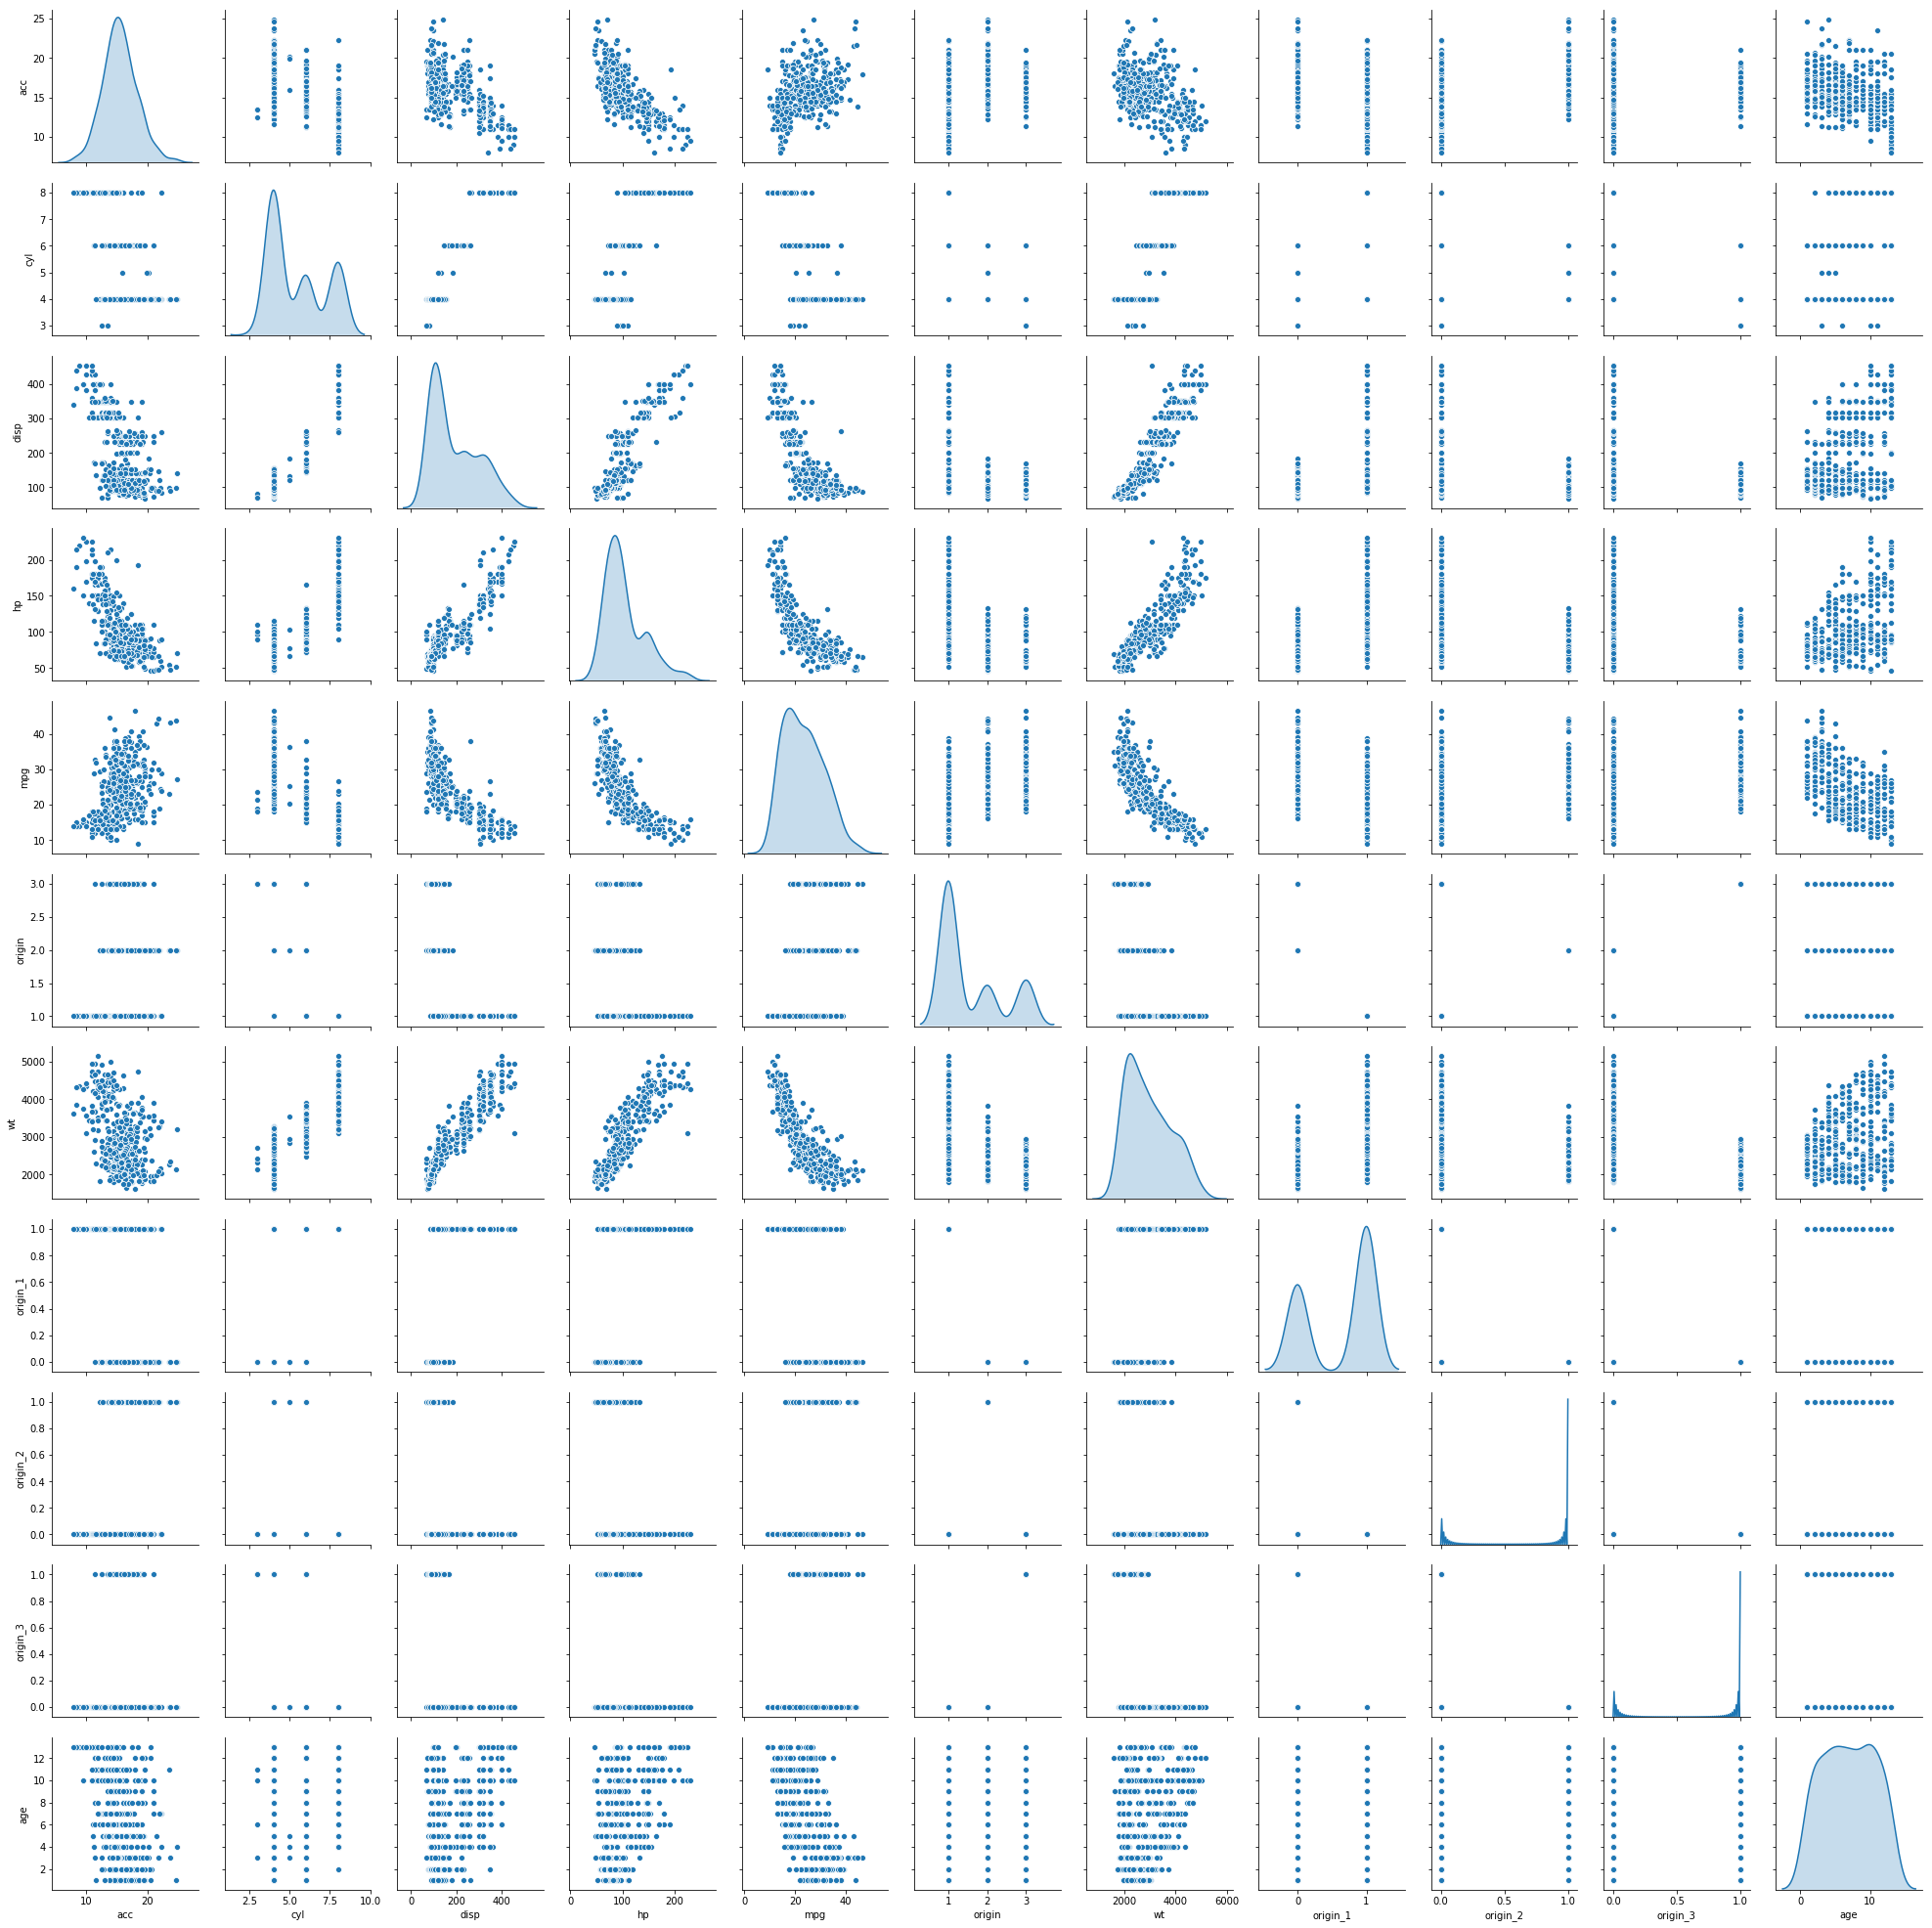

In [99]:
sns.pairplot(p_data, diag_kind= 'kde')

##### 1. 'hp' and 'disp' indicate the presence of minimum of 2 clusters
##### 2. 'mpg' seem to have non-linear relationship with 'wt', 'hp','disp'

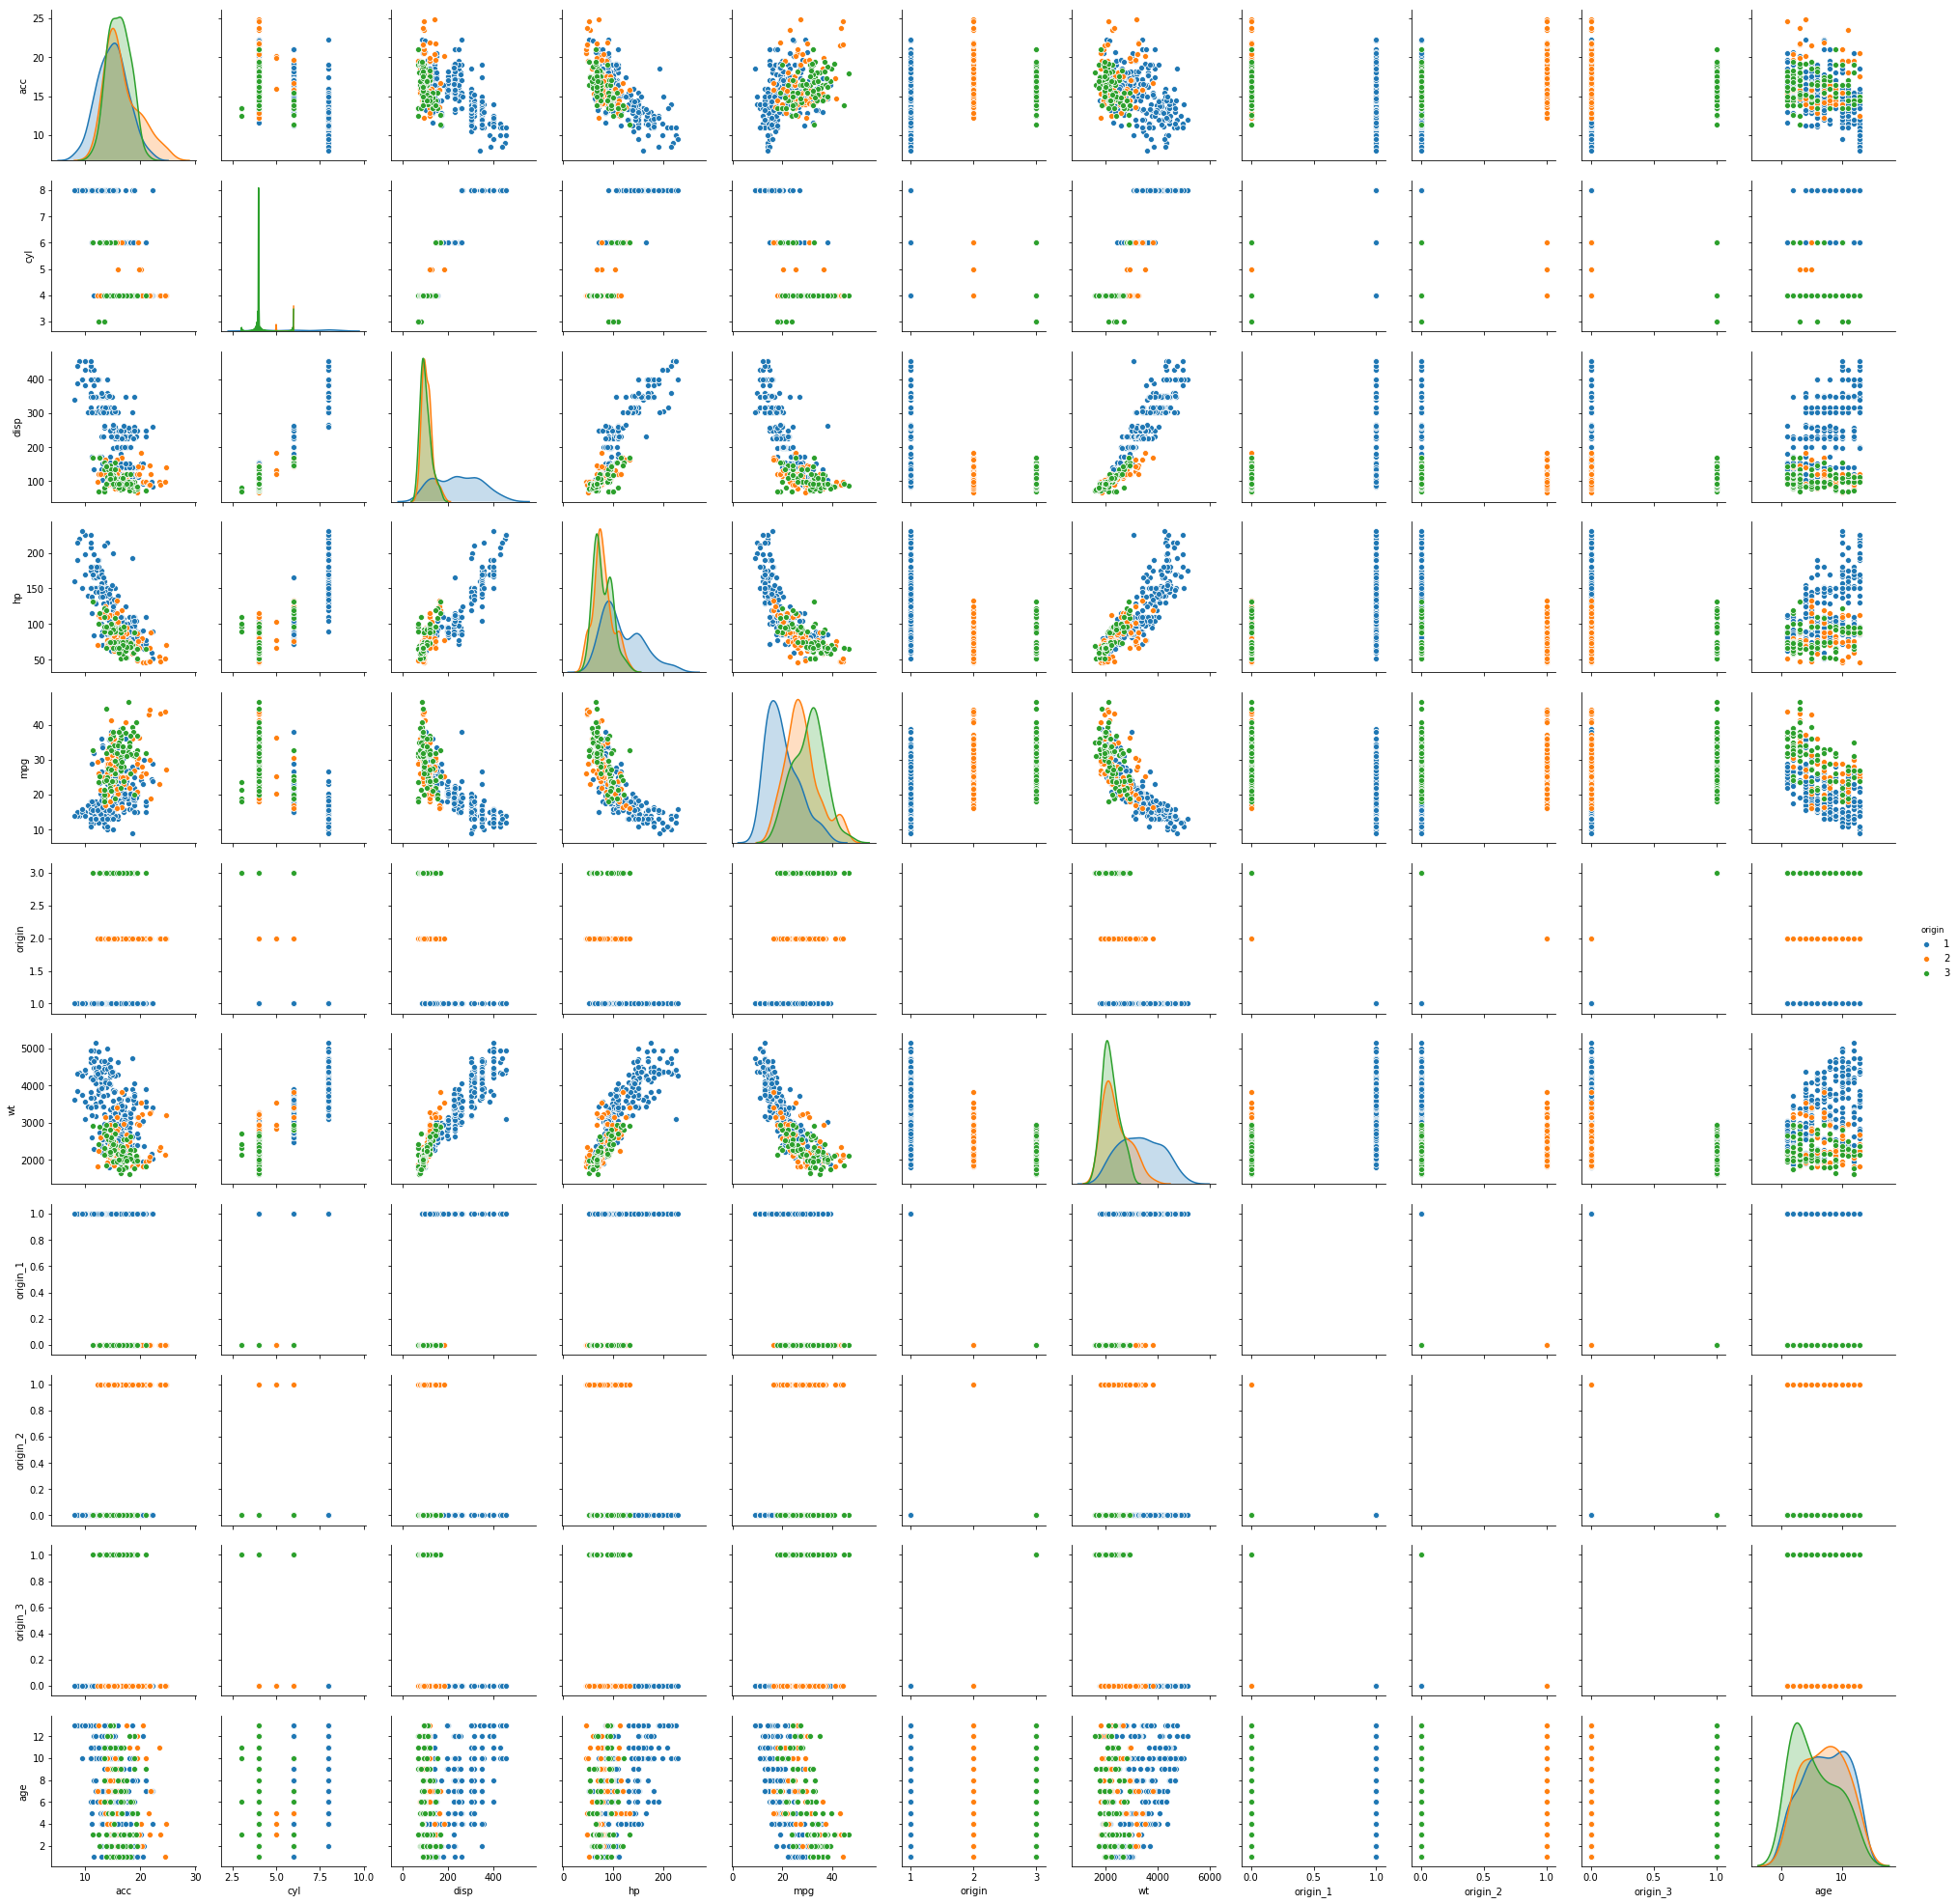

In [100]:
sns.pairplot(p_data, diag_kind= 'kde', hue='origin')

##### 1. Cars with 'Origin-Asia' seem to have higher 'mpg' and lower 'hp'
##### 2. Cars with 'Origin-America' seem to have lower 'mpg'
##### 3. Cars with 'Origin-Europe' seem to have mid range 'mpg'with lower 'hp' 

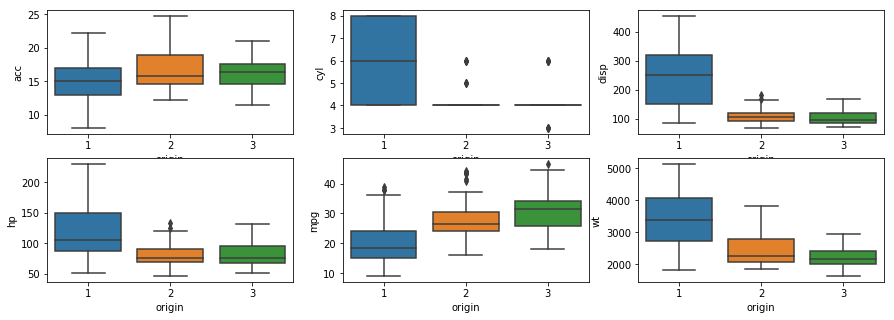

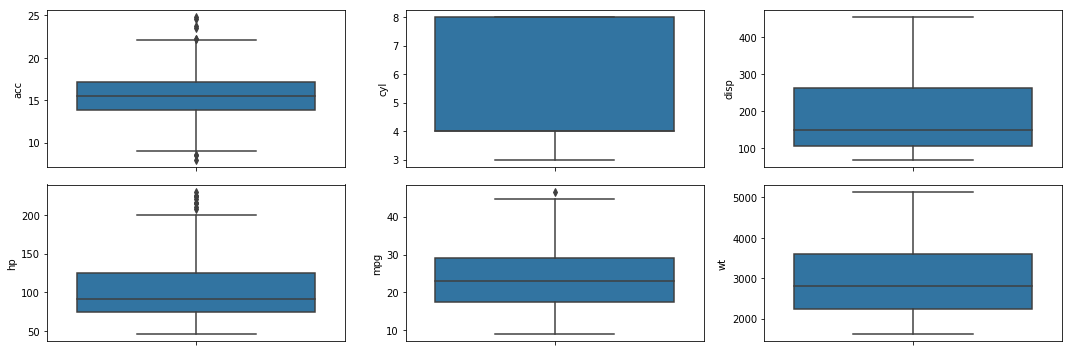

In [101]:
# Look at spread of continuous variables

continuous = ['acc','cyl','disp','hp','mpg','wt']

fig, axs = plt.subplots(2,3,figsize=(15,5))
fig, axs1 = plt.subplots(2,3,figsize=(15,5))

plt.rc('axes', titlesize=10)     # fontsize of the axes title
plt.rc('axes', labelsize=10)     # fontsize of the x and y labels

for i in range(0,len(continuous)): # continuous is declared earlier
    
    y=continuous[i]
    
    # set position of subplot using mod operator
    position = (i+1) % 3
    if  position == 0:
        position = 3 # if 2nd position, mod will be 0. Set it to 3.

    # set row of subplot using i
     
    if ((i+1)%5==1) and i!=0 :
        row = row+1
    
    # boxplot by origin
    sns.boxplot(ax = axs[row,position-1],
                y = y,
                data=p_data)
    
    #boxplot for entire data
    sns.boxplot(ax = axs1[row,position-1],
                y = y,
                data=p_data)
    
    plt.tight_layout()
    
plt.show()

##### 1. Parameters 'acc', 'cyl', 'disp', 'hp','mpg','wt' are differently distributed based on 'origin' of the car implying there could be 3 clusters in the data

In [102]:
# Let us take logarithmic transform for hp,mpg and acc to handle outliers
p_data['l_hp'] = np.log(p_data['hp'])
p_data['l_acc'] = np.log(p_data['acc'])
p_data['l_mpg'] = np.log(p_data['mpg'])

p_data.head()

car_name   acc  cyl   disp     hp   mpg  origin    wt  \
0  chevrolet chevelle malibu  12.0    8  307.0  130.0  18.0       1  3504   
1          buick skylark 320  11.5    8  350.0  165.0  15.0       1  3693   
2         plymouth satellite  11.0    8  318.0  150.0  18.0       1  3436   
3              amc rebel sst  12.0    8  304.0  150.0  16.0       1  3433   
4                ford torino  10.5    8  302.0  140.0  17.0       1  3449   

   origin_1  origin_2  origin_3  age      l_hp     l_acc     l_mpg  
0         1         0         0   13  4.867534  2.484907  2.890372  
1         1         0         0   13  5.105945  2.442347  2.708050  
2         1         0         0   13  5.010635  2.397895  2.890372  
3         1         0         0   13  5.010635  2.484907  2.772589  
4         1         0         0   13  4.941642  2.351375  2.833213

<b> 4. Machine learning: </b>
<br>
• Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data.
<br>
• Share your insights about the difference in using these two methods.

In [103]:
##### k-means centroid based clustering

#identify numeric columns to perform scaling. 
print(p_data.dtypes)
numeric_cols = p_data.select_dtypes(include=[np.int64, np.float64]).columns

#perform scaling
p_data_scaled = pd.DataFrame()
p_data_scaled[numeric_cols] = p_data[numeric_cols].apply(zscore) # scale data and assign it to new frame
p_data_scaled.describe()

car_name     object
acc         float64
cyl           int64
disp        float64
hp          float64
mpg         float64
origin        int64
wt            int64
origin_1      uint8
origin_2      uint8
origin_3      uint8
age           int64
l_hp        float64
l_acc       float64
l_mpg       float64
dtype: object


acc           cyl          disp            hp           mpg  \
count  3.980000e+02  3.980000e+02  3.980000e+02  3.980000e+02  3.980000e+02   
mean   8.982206e-17 -5.171742e-16 -8.312725e-17  6.611127e-17  2.761610e-16   
std    1.001259e+00  1.001259e+00  1.001259e+00  1.001259e+00  1.001259e+00   
min   -2.747814e+00 -1.444949e+00 -1.204411e+00 -1.519677e+00 -1.859374e+00   
25%   -6.328794e-01 -8.563206e-01 -8.563178e-01 -7.618741e-01 -7.704907e-01   
50%   -2.472221e-02 -8.563206e-01 -4.314040e-01 -3.176445e-01 -6.591883e-02   
75%    5.834349e-01  1.498191e+00  6.584879e-01  5.446835e-01  7.027050e-01   
max    3.351912e+00  1.498191e+00  2.511784e+00  3.288454e+00  2.957335e+00   

             origin            wt           age          l_hp         l_acc  \
count  3.980000e+02  3.980000e+02  3.980000e+02  3.980000e+02  3.980000e+02   
mean  -4.781212e-16 -9.902743e-17 -1.304373e-15 -5.852382e-16  2.194225e-15   
std    1.001259e+00  1.001259e+00  1.001259e+00  1.001259e+00  1.001259e+00   
min   -7.151448e-01 -1.604943e+00 -1.621983e+00 -2.215813e+00 -3.600090e+00   
25%   -7.151448e-01 -8.828266e-01 -8.096310e-01 -7.843199e-01 -5.694436e-01   
50%   -7.151448e-01 -1.973624e-01  2.721449e-03 -1.860657e-01  6.416447e-02   
75%    5.332220e-01  7.538337e-01  8.150739e-01  7.115336e-01  6.326494e-01   
max    1.781589e+00  2.565185e+00  1.627426e+00  2.497114e+00  2.668060e+00   

              l_mpg  
count  3.980000e+02  
mean   4.435313e-16  
std    1.001259e+00  
min   -2.665335e+00  
25%   -7.050785e-01  
50%    1.005515e-01  
75%    7.838699e-01  
max    2.182053e+00

##### mean is close to 0 and stdev is close to 1 for all  features

    num_clusters  cluster_errors   s_score      time  pc_drop
0              1     2786.000000  0.000000  0.209997     0.00
1              2     1257.251641  0.468264  0.013030     0.55
2              3      908.643305  0.361866  0.015999     0.28
3              4      717.253287  0.348113  0.015999     0.21
4              5      644.101897  0.316317  0.022001     0.10
5              6      597.790953  0.317741  0.025001     0.07
6              7      534.393651  0.253571  0.029002     0.11
7              8      487.692647  0.266251  0.031999     0.09
8              9      463.617853  0.242727  0.031002     0.05
9             10      418.089407  0.250776  0.031005     0.10
10            11      399.395241  0.260844  0.040999     0.04
11            12      378.843874  0.240566  0.032004     0.05
12            13      362.375127  0.252711  0.052004     0.04
13            14      340.781344  0.252615  0.046001     0.06
14            15      323.735740  0.249536  0.044000     0.05


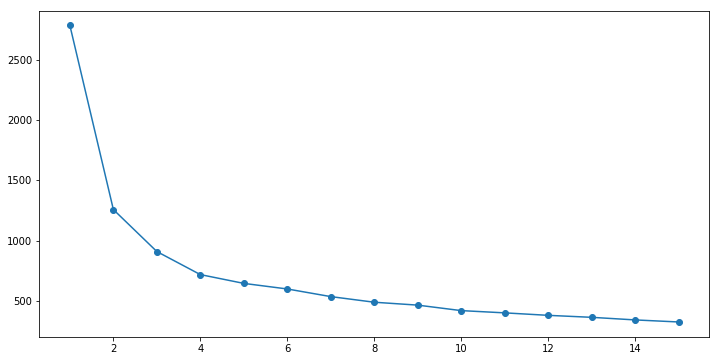

In [104]:
#drop 'origin' from dataset
p_data_cluster = p_data_scaled[['l_acc','cyl','disp','l_hp','l_mpg','wt','age']]

cluster_range = range(1,16)
cluster_errors = []
s_score = [] # silhoutte score
time_k = [] # to measure time taken

for num_clusters in cluster_range:
    start_time_kmeans = time.time() # start time
    clusters = KMeans(num_clusters, n_init = 5, random_state = 1) 
    clusters.fit(p_data_cluster) #fit data for k-means
    end_time_kmeans = time.time() # end time
    total_time_kmeans = end_time_kmeans - start_time_kmeans
    labels = clusters.labels_ # get cluster labels
    cluster_errors.append(clusters.inertia_) #append for elbow method
    time_k.append(total_time_kmeans)
    
    # Calculating silhouette_score
    if num_clusters == 1:
        s_score.append(0)
    else:
        s_score.append(silhouette_score(p_data_cluster,labels)) #use cluster labels to calculate silhouette score

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors, "s_score": s_score, "time": time_k})

#calculate percentage drop of inertia_. what is the percentage drop between (n) clusters and (n+1) clusters solutions
clusters_df['pc_drop']=0
for i in range(1,15):
    clusters_df.iloc[i,clusters_df.columns.get_loc('pc_drop')] = round((clusters_df.iloc[i-1,1]-clusters_df.iloc[i,1])/clusters_df.iloc[i-1,1],2)

print(clusters_df[0:16])

fig,ax=plt.subplots(1,1,figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

In [151]:
# number of clusters could lie between 2 and 4
clusters = pd.DataFrame()

# loop again to get labels for n_clusters  = 2,3,4 for further analysis
for num_clusters in [2,3,4]:
    kmeans = KMeans(n_clusters=num_clusters, n_init = 5, random_state=1,n_jobs=-1) 
    kmeans.fit(p_data_cluster)
    labels = kmeans.labels_ # get labels
    column = 'clusters'+'_'+str(num_clusters)
    clusters[column] = labels #append labels to check later
p_data_kmeans = p_data[['car_name','acc','cyl','disp','hp','mpg','origin','wt','age']]
p_data_kmeans = pd.concat([p_data_kmeans,clusters],axis=1) #concatenate data and labels

p_data_kmeans.groupby(['clusters_2']).mean()

acc       cyl        disp          hp        mpg    origin  \
clusters_2                                                                     
0           13.479365  7.619048  324.825397  149.476190  15.315873  1.023810   
1           16.535662  4.452206  132.556985   83.161765  27.312500  1.827206   

                     wt       age  clusters_3  clusters_4  
clusters_2                                                 
0           3990.428571  9.103175    0.507937    1.507937  
1           2497.922794  6.011029    1.238971    1.503676

In [109]:
p_data_kmeans.groupby(['clusters_3']).mean()

acc       cyl        disp          hp        mpg    origin  \
clusters_3                                                                     
0           12.576596  8.000000  350.042553  162.393617  14.429787  1.000000   
1           16.563285  4.004831  109.780193   78.183575  29.400000  2.000000   
2           16.343299  6.082474  220.154639  103.144330  19.758763  1.216495   

                     wt       age  clusters_2  clusters_4  
clusters_3                                                 
0           4157.978723  9.531915    0.000000    1.000000  
1           2306.067633  5.845411    1.000000    1.120773  
2           3237.350515  6.969072    0.670103    2.814433

In [110]:
p_data_kmeans.groupby(['clusters_4']).mean()

acc       cyl        disp          hp        mpg    origin  \
clusters_4                                                                     
0           16.372165  4.010309  110.097938   83.278351  25.018557  2.010309   
1           12.576596  8.000000  350.042553  162.393617  14.429787  1.000000   
2           16.716379  4.034483  111.517241   74.956897  32.560345  1.974138   
3           16.337363  6.175824  224.879121  103.472527  19.764835  1.186813   

                     wt       age  clusters_2  clusters_3  
clusters_4                                                 
0           2330.340206  9.515464    1.000000    1.061856  
1           4157.978723  9.531915    0.000000    0.000000  
2           2316.974138  3.000000    1.000000    1.000000  
3           3258.978022  6.758242    0.648352    2.000000

In [111]:
p_data_kmeans.groupby(['clusters_2']).size(),p_data_kmeans.groupby(['clusters_3']).size(),p_data_kmeans.groupby(['clusters_4']).size()

(clusters_2
 0    126
 1    272
 dtype: int64, clusters_3
 0     94
 1    207
 2     97
 dtype: int64, clusters_4
 0     97
 1     94
 2    116
 3     91
 dtype: int64)

In [113]:
rows=p_data_kmeans['clusters_2']
columns=p_data_kmeans['clusters_3']
pd.crosstab(rows,columns)

clusters_3   0    1   2
clusters_2             
0           94    0  32
1            0  207  65

##### Some of the cars from clusters_2=0 and clusters_2=1, club together to form the 3rd segment in 3 segment solution

In [114]:
rows=p_data_kmeans['clusters_3']
columns=p_data_kmeans['clusters_4']
pd.crosstab(rows,columns)

clusters_4   0   1    2   3
clusters_3                 
0            0  94    0   0
1           91   0  116   0
2            6   0    0  91

##### The 'high mpg' segment in 3 segment solution is split into 2. One is old cars (Age) and the other is new cars.

In [115]:
rows=p_data_kmeans['clusters_2']
columns=p_data_kmeans['clusters_4']
pd.crosstab(rows,columns)

clusters_4   0   1    2   3
clusters_2                 
0            0  94    0  32
1           97   0  116  59

##### We have 4 segments.
1. Cars with 'low mpg'
2. Cars with 'medium mpg'
3. Cars with 'high mpg' which are old (age)
4. Cars with 'high mpg' which are not old

"EDA" revealed around 3 segments. We need to check if we can combine 3 and 4 together.

In [126]:
rows=p_data_kmeans['origin']
columns=p_data_kmeans['clusters_4']
pd.crosstab(rows,columns,normalize='columns') # check % of cars by origin for cluster 4 solution

clusters_4         0    1         2         3
origin                                       
1           0.278351  1.0  0.413793  0.879121
2           0.432990  0.0  0.198276  0.054945
3           0.288660  0.0  0.387931  0.065934

In [164]:
rows=p_data_kmeans['origin']
columns=p_data_kmeans['clusters_3']
pd.crosstab(rows,columns) # check % of cars by origin for cluster 3 solution

clusters_3   0   1   2
origin                
1           94  73  82
2            0  61   9
3            0  73   6

##### Creating clusters based on 'age' might not be useful or relevant to client. So 3 cluster solution could be picked 

In [152]:
p_data_kmeans.groupby(['clusters_3'])['car_name'].unique() # check cars under each category

clusters_3
0    [chevrolet chevelle malibu, buick skylark 320, plymouth satellite, amc rebel sst, ford torino, ford galaxie 500, chevrolet impala, plymouth fury iii, pontiac catalina, amc ambassador dpl, dodge ch...
1    [toyota corona mark ii, datsun pl510, volkswagen 1131 deluxe sedan, peugeot 504, audi 100 ls, saab 99e, bmw 2002, chevrolet vega 2300, toyota corona, ford pinto, chevrolet vega (sw), mercury capri...
2    [plymouth duster, amc hornet, ford maverick, amc gremlin, plymouth satellite custom, chevrolet chevelle malibu, ford torino 500, amc matador, amc hornet sportabout (sw), pontiac firebird, ford mus...
Name: car_name, dtype: object

0 - 'low mpg' cars
<br>
1 - 'high mpg' cars
<br>
2 - 'medium mpg' cars

##### Hierarchical clustering

In [153]:
method = ['single','complete','average','weighted','ward'] # linkage methods

# loop through to  find which linkage method has high cophenetic correlation
for i in method:
    Z = linkage(p_data_cluster, metric='euclidean', method=i)
    c, coph_dists = cophenet(Z , pdist(p_data_cluster))
    print(i,":", round(c,2) ) # print cophenetic correlation to choose linkage method for the dataset

single : 0.73
complete : 0.79
average : 0.8
weighted : 0.71
ward : 0.78


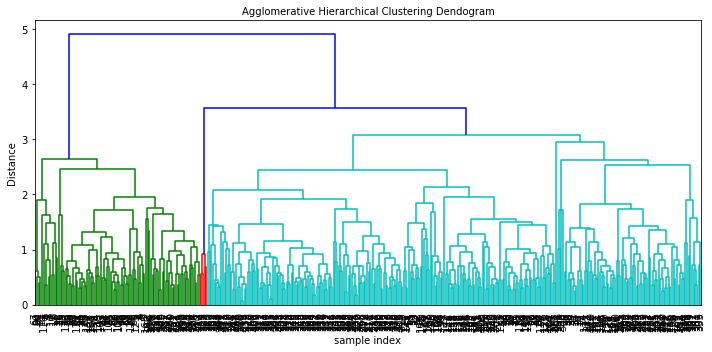

In [154]:
#linkage average has highest cophenetic correlation
Z = linkage(p_data_cluster, metric='euclidean', method='average')

plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=10.)
plt.tight_layout()

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 3.565574332844909, 3.565574332844909, 0.0],
  [0.0, 4.910409854480504, 4.910409854480504, 3.565574332844909]],
 'ivl': ['(99)', '(4)', '(295)'],
 'leaves': [790, 698, 792],
 'color_list': ['b', 'b']}

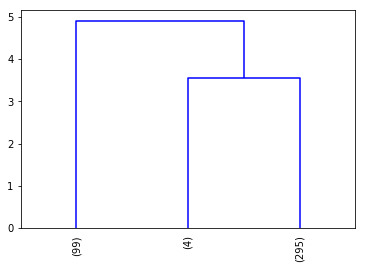

In [155]:
# use p=3, to check for 3 clusters based on above dendrogram

dendrogram(Z, leaf_rotation=90., leaf_font_size=10.,truncate_mode='lastp', p = 3)

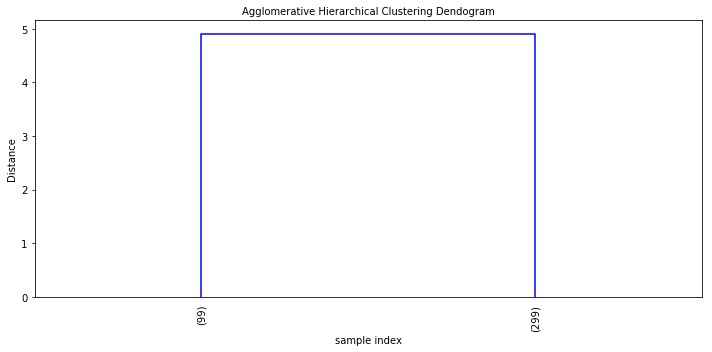

In [156]:
#Given that there are only 4 data points in one of those clusters, its better to go for 2 clusters.
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=10.,truncate_mode='lastp', p = 2)
plt.tight_layout()

In [157]:
# get labels for n_clusters = 2 using AgglomerativeClustering

start_time_hier = time.time() # start time
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
model.fit(p_data_cluster)
end_time_hier = time.time()   # end time
labels = model.labels_ 
labels = pd.Series(labels,name='clusters_hier')
total_time_hier = end_time_hier - start_time_hier
total_time_hier # total time

0.009035825729370117

In [158]:
p_data_allclusters = p_data_kmeans.copy()
p_data_allclusters = pd.concat([p_data_allclusters,labels],axis=1) # concatenate inputs, k means clusters and hierarchical cluster
p_data_allclusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
car_name         398 non-null object
acc              398 non-null float64
cyl              398 non-null int64
disp             398 non-null float64
hp               398 non-null float64
mpg              398 non-null float64
origin           398 non-null int64
wt               398 non-null int64
age              398 non-null int64
clusters_2       398 non-null int32
clusters_3       398 non-null int32
clusters_4       398 non-null int32
clusters_hier    398 non-null int64
dtypes: float64(4), int32(3), int64(5), object(1)
memory usage: 35.8+ KB


In [159]:
p_data_allclusters.groupby(['clusters_hier']).mean() #hierarchical clustering

acc      cyl        disp          hp        mpg  \
clusters_hier                                                          
0              16.519398  4.61204  142.700669   85.548495  26.448495   
1              12.694949  8.00000  346.626263  160.353535  14.653535   

                 origin           wt      age  clusters_2  clusters_3  \
clusters_hier                                                           
0              1.762542  2587.016722  6.22408    0.909699    1.307692   
1              1.000000  4128.393939  9.30303    0.000000    0.101010   

               clusters_4  
clusters_hier              
0                1.638796  
1                1.101010

In [160]:
p_data_allclusters.groupby(['clusters_2']).mean() #kmeans

acc       cyl        disp          hp        mpg    origin  \
clusters_2                                                                     
0           13.479365  7.619048  324.825397  149.476190  15.315873  1.023810   
1           16.535662  4.452206  132.556985   83.161765  27.312500  1.827206   

                     wt       age  clusters_3  clusters_4  clusters_hier  
clusters_2                                                                
0           3990.428571  9.103175    0.507937    1.507937       0.785714  
1           2497.922794  6.011029    1.238971    1.503676       0.000000

In [161]:
# lets check overlap between these cluster solutions
row = p_data_allclusters['clusters_2']
column = p_data_allclusters['clusters_hier']

pd.crosstab(row,column)

clusters_hier    0   1
clusters_2            
0               27  99
1              272   0

##### There is a good overlap between these 2 clustering approaches for 2 cluster segments

In [136]:
p_data_allclusters.groupby(['clusters_hier'])['origin'].value_counts()

clusters_hier  origin
0              1         150
               3          79
               2          70
1              1          99
Name: origin, dtype: int64

In [179]:
p_data_allclusters.to_excel('data with clusters.xlsx',index=False)

##### Summary:

|k-means Cluster(n=3) size | Origin-America | Origin-Europe|Origin-Japan|Profile|Car name examples|
| :----- | :---- | :---- | :---- | :---- | :---- |
| 24% | 24%  | 0% | 0% | Heavy vehicles, low mpg, high hp, high disp with more cyclinders from America | chevrolet chevelle malibu, ford gran torino, plymouth satellite|
| 24% | 21%  | 2% | 2% | Medim heavy vehicles, medium mpg mostly from America |ford maverick, amc hornet, chevrolet nova|
| 52% | 18% | 15% | 18% | Not heavy vehicles, high mpg, low hp, low disp with less cyclinders from all three continents|ford pinto,toyota corolla,chevrolet chevette|

|Hierarchical Cluster size | Origin-America | Origin-Europe|Origin-Japan|Profile|
| :----- | :---- | :---- | :---- | :---- |
| 25% | 25%  | 0% | 0% | Heavy vehicles, lower mpg, high hp, high disp with more cyclinders from America  |
| 75% | 38% | 18% | 20% |Not heavy vehicles, higher mpg, low hp, low disp with less cyclinders from all three continents|


<b> Share your insights about the difference in using these two methods. </b>

1. In K-means clustering, we have to figure out optimal K by usign a combination of elbow method, silhouette co-efficient and cluster profiles
2. In Hierarchical clustering, we need to identify the linkage method that would work best for the dataset. Here,'average' worked well with high cophenetic correlation. Optimal clusters can be obtained from Dendrogram
3. k-means takes lesser time (once optimal k is identified), so can be used if there are many iterations.

<b> 5. Answer below questions based on outcomes of using ML based methods.</b>
<br>
• Mention how many optimal clusters are present in the data and what could be the possible reason behind it.

There seem to be 3 optimal clusters as evident from k-means
1. Heavy vehicles, lower mpg, high hp, high displacement with more cyclinders, origin from America
2. Medim heavy vehicles, medium mpg vehicles mainly from America
3. Not heavy vehicles, higher mpg, low hp, low displacement with less cyclinders from all three continents

It looks like cheaper, low hp cars from Europe and Asia are competing with similar car category in America. More context is required to comment on this further

• Use linear regression model on different clusters separately and print the coefficients of the models individually

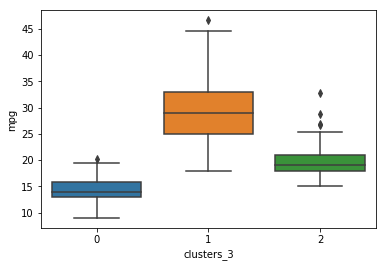

In [180]:
sns.boxplot(p_data_allclusters['clusters_3'],p_data_allclusters['mpg']) # check mpg distribution for the 3 clusters before going into model

In [188]:
# concatenate origin and scaled variables to build dataset required for regression
p_data_reg = p_data[['l_acc','cyl','disp','l_hp','mpg','wt','age','origin_1','origin_2','origin_3']] 
p_data_reg.describe()

l_acc         cyl        disp        l_hp         mpg  \
count  398.000000  398.000000  398.000000  398.000000  398.000000   
mean     2.729258    5.454774  193.425879    4.585329   23.514573   
std      0.180727    1.701004  104.269838    0.341924    7.815984   
min      2.079442    3.000000   68.000000    3.828641    9.000000   
25%      2.626474    4.000000  104.250000    4.317488   17.500000   
50%      2.740840    4.000000  148.500000    4.521789   23.000000   
75%      2.843452    8.000000  262.000000    4.828314   29.000000   
max      3.210844    8.000000  455.000000    5.438079   46.600000   

                wt         age    origin_1    origin_2    origin_3  
count   398.000000  398.000000  398.000000  398.000000  398.000000  
mean   2970.424623    6.989950    0.625628    0.175879    0.198492  
std     846.841774    3.697627    0.484569    0.381197    0.399367  
min    1613.000000    1.000000    0.000000    0.000000    0.000000  
25%    2223.750000    4.000000    0.000000    0.000000    0.000000  
50%    2803.500000    7.000000    1.000000    0.000000    0.000000  
75%    3608.000000   10.000000    1.000000    0.000000    0.000000  
max    5140.000000   13.000000    1.000000    1.000000    1.000000

In [586]:
# # 1. Separate majority and minority classes
# #2. Downsample majority class
# #3. Append and create a new dataset.
# #4. Downsample it again to minority class
# #5. Do regression

# df_majority = p_data_reg[p_data_reg['clusters_2']==1]
# df_minority = p_data_reg[p_data_reg['clusters_2']==0]

# # downsample majority class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=125,     # to match minority class
#                                  random_state=123) # reproducible results

# # Combine majority class with upsampled minority class
# df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# # downsample total dataset
# df_downsample_2 = resample(df_downsampled, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=125,     # to match minority class
#                                  random_state=123,
#                                  stratify = df_downsampled['clusters_2']) # reproducible results

 
# # Display new class counts
# df_downsample_2['clusters_2'].value_counts()

In [195]:
# Distribution on mpg on both the clusters look clearly different
def lin_mod(X,y,): #synthetic = False):
    """
        This function splits dependent and independent variables into train and test datasets. It builds regression
        model on the train set and calculates accuracy on both train and test. 
        
        output: prints co-efficients of variables and train and test accuracy
        
    """
    # Split X and y into training and test set in 70:30 ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)
    
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    
    #get co-efficient of 'disp'
    for idx, col_name in enumerate(X_train.columns):
        print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

    #get intercept    
    intercept = regression_model.intercept_[0]
    print("The intercept for our model is {}".format(intercept))

    #check accuracy of train and test
    train_accuracy=regression_model.score(X_train, y_train)
    test_accuracy=regression_model.score(X_test, y_test)
    print("Train Accuracy:",round(train_accuracy,2), "Test Accuracy:",round(test_accuracy,2),"\n")
    
    
    #scale input variables before feeding into Lasso as regularisation requires data to be scaled
    scale = StandardScaler()

    # fit with train data
    xs_train = pd.DataFrame(scale.fit_transform(X_train), columns=X_train.columns)

    # apply mean and std.dev of train data to test data using transform
    xs_test = pd.DataFrame(scale.transform(X_test), columns=X_train.columns)
    
    lasso = Lasso(alpha=0.1)
    lasso.fit(xs_train,y_train)
    
    #get co-efficient
    print("Lasso coefficients:")
    for idx, col_name in enumerate(xs_train.columns):
        print("The coefficient for {} is {}".format(col_name, lasso.coef_[idx]))
        
    #get intercept    
    intercept = lasso.intercept_[0]
    print("The intercept for lasso is {}".format(intercept))
    
    print("Train Accuracy:",round(lasso.score(xs_train, y_train),2), "Test Accuracy:",round(lasso.score(xs_test, y_test),2))
    print("Train dataset shape",xs_train.shape,"Test dataset shape",xs_test.shape)

# Independent variables
X = p_data_reg[['l_acc','cyl','disp','l_hp','wt','age','origin_1','origin_2','origin_3']]


# the dependent variable
y = p_data_reg[['mpg']]
# y = p_data_allclusters[['mpg']]
lin_mod(X,y)

The coefficient for l_acc is -6.789154012317951
The coefficient for cyl is -0.34378701733807204
The coefficient for disp is 0.017708831339914462
The coefficient for l_hp is -10.922377092412667
The coefficient for wt is -0.004018795037006532
The coefficient for age is -0.7686715777087239
The coefficient for origin_1 is -1.7411179391310783
The coefficient for origin_2 is 0.985413132395702
The coefficient for origin_3 is 0.7557048067353588
The intercept for our model is 108.80624723172339
Train Accuracy: 0.83 Test Accuracy: 0.85 

Lasso coefficients:
The coefficient for l_acc is -1.0505161072143996
The coefficient for cyl is -0.0
The coefficient for disp is 0.0
The coefficient for l_hp is -3.2568356323462626
The coefficient for wt is -2.6239637612220035
The coefficient for age is -2.6167632113589665
The coefficient for origin_1 is -0.9958827863385209
The coefficient for origin_2 is 0.0
The coefficient for origin_3 is 0.0
The intercept for lasso is 23.815966386554617
Train Accuracy: 0.82 T

84% of the variance in 'mpg' is explained by the model

In [190]:
# Split the dataset by Clusters and build model for each cluster separately
p_data_reg=pd.concat([p_data_reg,p_data_allclusters['clusters_3']],axis=1)
p_data_reg1 = p_data_reg[p_data_reg['clusters_3']==0]  #filter only one cluster (low mpg cluster)

In [193]:
p_data_reg1.describe()

l_acc   cyl        disp       l_hp        mpg           wt  \
count  94.000000  94.0   94.000000  94.000000  94.000000    94.000000   
mean    2.521642   8.0  350.042553   5.078259  14.429787  4157.978723   
std     0.145548   0.0   44.451475   0.151500   2.143900   438.856480   
min     2.079442   8.0  302.000000   4.787492   9.000000  3086.000000   
25%     2.442347   8.0  309.750000   4.976734  13.000000  3872.500000   
50%     2.549445   8.0  350.000000   5.010635  14.000000  4199.500000   
75%     2.613719   8.0  383.000000   5.164786  15.875000  4436.250000   
max     2.917771   8.0  455.000000   5.438079  20.200000  5140.000000   

             age  origin_1  origin_2  origin_3  clusters_3  
count  94.000000      94.0      94.0      94.0        94.0  
mean    9.531915       1.0       0.0       0.0         0.0  
std     2.754086       0.0       0.0       0.0         0.0  
min     4.000000       1.0       0.0       0.0         0.0  
25%     7.000000       1.0       0.0       0.0         0.0  
50%    10.000000       1.0       0.0       0.0         0.0  
75%    12.000000       1.0       0.0       0.0         0.0  
max    13.000000       1.0       0.0       0.0         0.0

In [196]:
# Independent variables
X = p_data_reg1[['l_acc','cyl','disp','l_hp','wt','age','origin_1','origin_2','origin_3']] 

# the dependent variable
y = p_data_reg1[['mpg']]

lin_mod(X,y)

The coefficient for l_acc is -5.941006646427091
The coefficient for cyl is -1.8453702108067738e-12
The coefficient for disp is 0.0008785855535521754
The coefficient for l_hp is -6.153579217108128
The coefficient for wt is -0.0013491435394895085
The coefficient for age is -0.3071415048454343
The coefficient for origin_1 is 0.0
The coefficient for origin_2 is 0.0
The coefficient for origin_3 is 0.0
The intercept for our model is 68.93820217105859
Train Accuracy: 0.64 Test Accuracy: 0.33 

Lasso coefficients:
The coefficient for l_acc is -0.7945563966307503
The coefficient for cyl is 0.0
The coefficient for disp is 0.0
The coefficient for l_hp is -0.8469653041447135
The coefficient for wt is -0.6142845050746637
The coefficient for age is -0.7917741085139353
The coefficient for origin_1 is 0.0
The coefficient for origin_2 is 0.0
The coefficient for origin_3 is 0.0
The intercept for lasso is 14.35
Train Accuracy: 0.63 Test Accuracy: 0.35
Train dataset shape (56, 9) Test dataset shape (38, 9

##### Accuracy for this Cluster is much lower than the combined model. This could be because of lesser sample in the training set. Co-efficients match intuition. For ex: origin_3 is 0 for this dataset as Asia cars are high mpg etc.

In [197]:
p_data_reg1 = p_data_reg[p_data_reg['clusters_3']==1]  #filter only one cluster (high mpg cluster)

# Independent variables
X = p_data_reg1[['l_acc','cyl','disp','l_hp','wt','age','origin_1','origin_2','origin_3']] 
# the dependent variable
y = p_data_reg1[['mpg']]
lin_mod(X,y)

The coefficient for l_acc is 2.218905291901629
The coefficient for cyl is 4.0829419990714495
The coefficient for disp is 0.00857851069216825
The coefficient for l_hp is -1.5890807695080202
The coefficient for wt is -0.009710389462654997
The coefficient for age is -0.9889594508852388
The coefficient for origin_1 is -1.3875621835041585
The coefficient for origin_2 is 1.2231900390041108
The coefficient for origin_3 is 0.1643721445000465
The intercept for our model is 41.27874921085136
Train Accuracy: 0.7 Test Accuracy: 0.67 

Lasso coefficients:
The coefficient for l_acc is 0.014461422465857484
The coefficient for cyl is 1.0797124425761322
The coefficient for disp is -0.0
The coefficient for l_hp is -0.6727734307809219
The coefficient for wt is -2.832939693513223
The coefficient for age is -3.4642705660830604
The coefficient for origin_1 is -0.6732315627024835
The coefficient for origin_2 is 0.2949504532831856
The coefficient for origin_3 is 0.0
The intercept for lasso is 29.9419354838709

##### Again, accuracy for this Cluster is also much lower than the combined model.

In [198]:
p_data_reg1 = p_data_reg[p_data_reg['clusters_3']==2]  #filter only one cluster (medium mpg cluster)

# Independent variables
X = p_data_reg1[['l_acc','cyl','disp','l_hp','wt','age','origin_1','origin_2','origin_3']] 
# the dependent variable
y = p_data_reg1[['mpg']]
lin_mod(X,y)

The coefficient for l_acc is -8.694563959981897
The coefficient for cyl is -0.3147976820509048
The coefficient for disp is -0.014382317046554047
The coefficient for l_hp is -1.0524135929634342
The coefficient for wt is -0.0015459619411263541
The coefficient for age is -0.5024043949415816
The coefficient for origin_1 is 0.19594044804929003
The coefficient for origin_2 is -3.0320906533778147
The coefficient for origin_3 is 2.83615020532852
The intercept for our model is 62.408833561305734
Train Accuracy: 0.64 Test Accuracy: -0.09 

Lasso coefficients:
The coefficient for l_acc is -0.807797301879283
The coefficient for cyl is -0.0
The coefficient for disp is -0.4119308013024828
The coefficient for l_hp is -0.0
The coefficient for wt is -0.7327065993617793
The coefficient for age is -1.4323518290084936
The coefficient for origin_1 is 0.0
The coefficient for origin_2 is -0.7498479480728908
The coefficient for origin_3 is 0.48363510225813566
The intercept for lasso is 19.660344827586208
Trai

To know if different models are really beneficial, we can plot pca1 for both clusters and see visually, as currently accuracy looks lower for separate models
1. Use pca for the independent variables and build a model for the top most component and see if slopes for both clusters are very different


##### How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction.

[7.26623691e+05 1.39426128e+03 1.16359154e+01 2.76278006e-01
 3.46669281e-02 6.09581933e-03]
[9.98068466e-01 1.91511540e-03 1.59827438e-05 3.79487167e-07
 4.76174507e-08 8.37303425e-09]


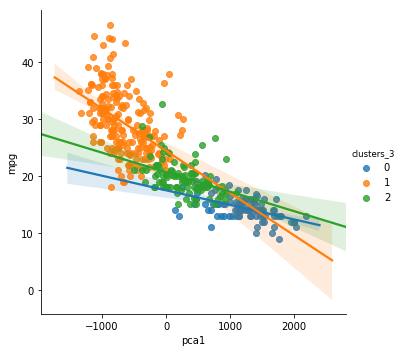

In [199]:
# Use PCA for dimensionality reduction
x_for_pca= p_data_reg[['l_acc','cyl','disp','l_hp','wt','age']]

x_for_pca.describe() # check mean and stdev

# calculate PCA
pca = PCA(n_components=len(x_for_pca.columns))
x_pca = pca.fit_transform(x_for_pca)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

p_data_reg['pca1']=x_pca[:,0] # assign first pca component to regression dataset
p_data_reg['clusters_3']=p_data_allclusters['clusters_3']
# fig, axs = plt.subplots(1,2,figsize=(10,5))
sns.lmplot(y='mpg', x='pca1',hue='clusters_3', data=p_data_reg)

Slope for 'lower mpg' category and 'higher mpg' category are very different. Clearly building 2 models might be helpful. We need more data for both categories to arrive at a conclusion
Tried downsampling(To minority class) and upsampling (To majority class) but got similar results

<b> 6. Improvisation: </b>
<br>
• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to
perform a better data analysis in future.

<b> Quality of data </b>: 
<br>
1.Some rows of 'hp' were filled with '?'. If details are not available, leaving them blank is better.
<br>
<b> Quantity of data </b>:
1. Providing more data for the 2 cluster category would help us to arrive at  a conclusion if 2 regression models are better for this context. Analysis using PCA1 seems to indicate in this direction
<br>
<b>Variety, Velocity, Veracity of data</b>: 
<br>
1. Data seem to be taken from 1983. Current year data would help us to explain present auto industry
2. More details such as 'Price of vehicle', 'Fuel type:Petrol/Diesel", "Vehicle type: Sedan/Hatchback/Van etc" and more context would help us to analyse the market better.Currently it appears that Asian and European cars are competing in low price/high mileage segment with US cars in the American market and the data is taken from 1983. More details and context required.

# PART - TWO

<b>DOMAIN:</b> Manufacturing 

<b> CONTEXT: </b> Company X curates and packages wine across various vineyards spread throughout the country.

<b> DATA DESCRIPTION: </b> The data concerns the chemical composition of the wine and its respective quality.
Attribute Information:
1. A, B, C, D: specific chemical composition measure of the wine
2. Quality: quality of wine [ Low and High ]

<b> PROJECT OBJECTIVE: </b> Goal is to build a synthetic data generation model using the existing data provided by the company

<b> Steps and tasks: </b>

1. Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data.

In [135]:
# all imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#clustering related
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline

In [136]:
# read input
data_wine = pd.read_excel("Part2 - Company.xlsx")
data_wine.shape,data_wine.info() # check input data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
A          61 non-null int64
B          61 non-null int64
C          61 non-null int64
D          61 non-null int64
Quality    43 non-null object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


((61, 5), None)

##### Quality has 18 missing values out of 61.

In [137]:
data_wine.sample(10)

A    B    C    D    Quality
28   85   58   44   32  Quality A
51  110   33   76    3  Quality A
10   76   94  107   37  Quality A
48  197  161  182  198  Quality B
8   160  181  194  178  Quality B
49  136  199  189  141  Quality B
21    5  100   32  110  Quality A
55  103   60   15   56  Quality A
18  167  171  163  191        NaN
1   174  133  134  166  Quality B

In [138]:
data_wine['Quality'].unique()

array(['Quality A', 'Quality B', nan], dtype=object)

In [139]:
data_wine.describe(),data_wine.corr()

(                A           B           C           D
 count   61.000000   61.000000   61.000000   61.000000
 mean   118.557377  116.639344  114.081967  114.459016
 std     61.771494   57.897908   65.615368   63.144431
 min      3.000000    5.000000    3.000000    3.000000
 25%     61.000000   63.000000   59.000000   51.000000
 50%    136.000000  138.000000  135.000000  132.000000
 75%    171.000000  168.000000  174.000000  174.000000
 max    200.000000  200.000000  200.000000  199.000000,
           A         B         C         D
 A  1.000000  0.772930  0.829806  0.797586
 B  0.772930  1.000000  0.855366  0.791915
 C  0.829806  0.855366  1.000000  0.821135
 D  0.797586  0.791915  0.821135  1.000000)

##### 1. A,B,C,D are highly correlated and slightly left skewing

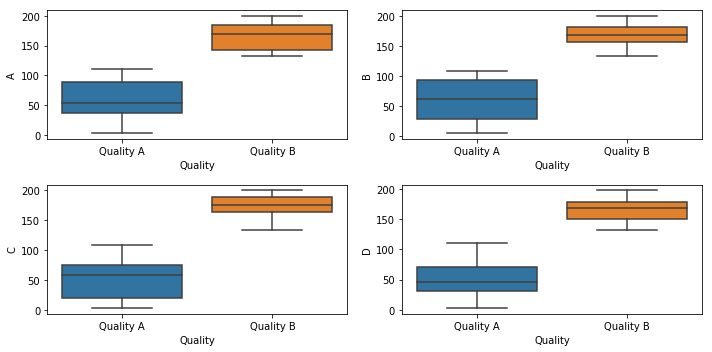

In [141]:
# Look at spread of continuous variables

continuous = ['A','B','C','D']

fig, axs = plt.subplots(2,2,figsize=(10,5))
plt.rc('axes', titlesize=10)     # fontsize of the axes title
plt.rc('axes', labelsize=10)     # fontsize of the x and y labels

for i in range(0,len(continuous)): # continuous is declared earlier
    
    y=continuous[i]
    
    # set position of subplot using mod operator
    position = (i+1) % 2
    if  position == 0:
        position = 2 # if 2nd position, mod will be 0. Set it to 3.

    # set row of subplot using i
    if i < 2:
        row = 0
    else:
        row = 1
    
    sns.boxplot(ax = axs[row,position-1],
                y = y,
                x="Quality",
                data=data_wine)
        
    plt.tight_layout()
    
plt.show()

##### Distribution of variables are quite different for 'Quality A' and 'Quality B'

In [142]:
# Applying cluster solutions to identify pattern
p_data = data_wine.copy()

#perform scaling
p_data_scaled = pd.DataFrame()
numeric_cols = ['A','B','C','D']
p_data_scaled[numeric_cols] = p_data[numeric_cols].apply(zscore)
p_data_scaled.describe()

A             B             C             D
count  6.100000e+01  6.100000e+01  6.100000e+01  6.100000e+01
mean  -6.734140e-17  1.274026e-17  3.458072e-17 -2.912060e-17
std    1.008299e+00  1.008299e+00  1.008299e+00  1.008299e+00
min   -1.886248e+00 -1.944212e+00 -1.706975e+00 -1.779793e+00
25%   -9.395117e-01 -9.341355e-01 -8.464341e-01 -1.013322e+00
50%    2.847167e-01  3.719983e-01  3.214434e-01  2.800968e-01
75%    8.560233e-01  8.944519e-01  9.207490e-01  9.507586e-01
max    1.329392e+00  1.451736e+00  1.320286e+00  1.349962e+00

In [143]:
# Apply KMeans n=2 clusters
clusters = KMeans(n_clusters=2, n_init = 5, random_state = 1,n_jobs=-1) 
clusters.fit(p_data_scaled) #fit data for k-mean
labels = clusters.labels_
s_score = silhouette_score(p_data_scaled,labels) #use cluster labels to calculate silhouette score
s_score

0.6891674125195145

In [144]:
p_data = pd.concat([p_data,pd.DataFrame(labels,columns=['Clusters'])],axis=1)
p_data.sample(10)

A    B    C    D    Quality  Clusters
60  157  135  135  156        NaN         0
5   153  140  154  199        NaN         0
49  136  199  189  141  Quality B         0
21    5  100   32  110  Quality A         1
6    34   28   78   22  Quality A         1
18  167  171  163  191        NaN         0
19  196  178  165  177  Quality B         0
41   73   22   83   31  Quality A         1
54   70   96   70  103  Quality A         1
56  200  186  185  179  Quality B         0

In [145]:
row = p_data['Quality']
column = p_data['Clusters']
pd.crosstab(row,column)

Clusters    0   1
Quality          
Quality A   0  26
Quality B  17   0

##### Crosstab reveals that 2 clusters obtained from k-means is same as 'Quality' column. 
##### Cluster '0' is same as 'Quality B' and Cluster '1' is same as 'Quality A'

In [146]:
p_data.groupby(['Clusters']).size()

Clusters
0    33
1    28
dtype: int64

There are 28 'Quality A' and 33 'Quality B' wines in the given dataset. 

<b> Solution: </b> K-Means with n_clusters = 2 reveals that 'Quality' column can be obtained using this methodology and can be used to capture the missing data

# PART - THREE

<b> DOMAIN: </b> Automobile 

<b>CONTEXT: </b> The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette.
The vehicle may be viewed from one of many different angles.

<b> DATA DESCRIPTION: </b> The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles
were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of
vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more
difficult to distinguish between the cars.
• All the features are numeric i.e. geometric features extracted from the silhouette.

<b> PROJECT OBJECTIVE: </b> Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the
model using just the raw data.

<b>Steps and tasks:</b>
1. Data: Import, clean and pre-process the data

In [179]:
# all imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import time
from scipy.stats import zscore
from collections import Counter

from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
# read input
data_veh = pd.read_csv("Part3 - vehicle.csv")
data_veh.shape,data_veh.info() # check input data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

((846, 19), None)

In [181]:
# There are many null  values across various columns. 
data_veh.sample(10)

compactness  circularity  distance_circularity  radius_ratio  \
575          109         54.0                 103.0         220.0   
55            94         36.0                  66.0         151.0   
477           89         46.0                  78.0         150.0   
281           82         43.0                  73.0         154.0   
7             90         43.0                  66.0         157.0   
431           99         47.0                  91.0         226.0   
743           98         48.0                 101.0         203.0   
769           91         36.0                  83.0         162.0   
292           87         42.0                  76.0         159.0   
33           101         48.0                 107.0         222.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
575                  66.0                       11          214.0   
55                   61.0                        8          133.0   
477                  63.0                       11          160.0   
281                  65.0                        7          151.0   
7                    65.0                        9          137.0   
431                  74.0                        5          202.0   
743                  65.0                        9          197.0   
769                  61.0                        8          142.0   
292                  65.0                        5          155.0   
33                   68.0                       10          208.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
575           31.0                    24.0                        167   
55            50.0                    18.0                        135   
477           43.0                    20.0                        160   
281           44.0                    19.0                        143   
7             48.0                    18.0                        146   
431           32.0                    23.0                        148   
743           33.0                    23.0                        152   
769           47.0                    19.0                        128   
292           42.0                    19.0                        138   
33            32.0                    24.0                        154   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
575            229.0              677.0                      212.0   
55             154.0              265.0                      119.0   
477            170.0              367.0                      176.0   
281            178.0              341.0                      160.0   
7              162.0              281.0                      164.0   
431            234.0              629.0                      186.0   
743            216.0              584.0                      174.0   
769            163.0              298.0                      137.0   
292            184.0              362.0                      157.0   
33             232.0              641.0                      204.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
575                         70.0             1.0              23.0   
55                          62.0             9.0               3.0   
477                         73.0             5.0               9.0   
281                         76.0             5.0              11.0   
7                           67.0             3.0               3.0   
431                         79.0             4.0              11.0   
743                         68.0             2.0               5.0   
769                         63.0             0.0              31.0   
292                         76.0             6.0              12.0   
33                          70.0             5.0              38.0   

     skewness_about.2  hollows_ratio class  
575             188.0            201   car  
55              201.0            208   van  
477 

In [182]:
# Lets look at null rows.
data_veh[data_veh.isnull().sum(axis=1)>0]

compactness  circularity  distance_circularity  radius_ratio  \
5            107          NaN                 106.0         172.0   
9             93         44.0                  98.0           NaN   
19           101         56.0                 100.0         215.0   
35           100         46.0                   NaN         172.0   
66            81         43.0                  68.0         125.0   
70            96         55.0                  98.0         161.0   
77            86         40.0                  62.0         140.0   
78           104         52.0                  94.0           NaN   
105          108          NaN                 103.0         202.0   
118           85          NaN                   NaN         128.0   
141           81         42.0                  63.0         125.0   
159           91         45.0                  75.0           NaN   
177           89         44.0                  72.0         160.0   
192           93         43.0                  76.0         149.0   
207           85         42.0                   NaN         121.0   
215           90         39.0                  86.0         169.0   
222          100         50.0                  81.0         197.0   
237           85         45.0                  65.0         128.0   
249           85         34.0                  53.0         127.0   
266           86          NaN                  65.0         116.0   
273           96         45.0                  80.0         162.0   
285           89         48.0                  85.0         189.0   
287           88         43.0                  84.0           NaN   
308          109         51.0                 100.0         197.0   
319          102         51.0                   NaN         194.0   
329           89         38.0                  80.0         169.0   
345          101         54.0                 106.0           NaN   
372           97         47.0                  87.0         164.0   
396          108          NaN                 106.0         177.0   
419           93         34.0                  72.0         144.0   
467           96         54.0                 104.0           NaN   
496          106         55.0                  98.0         224.0   
522           89         36.0                  69.0         162.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                    50.0                        6          255.0   
9                    62.0                       11          183.0   
19                    NaN                       10          208.0   
35                   67.0                        9          157.0   
66                   57.0                        8          149.0   
70                   54.0                       10          215.0   
77                   62.0                        7          150.0   
78                   66.0                        5          208.0   
105                  64.0                       10          220.0   
118                  56.0                        8          150.0   
141                  55.0                        8          149.0   
159                  57.0                        6          150.0   
177                  66.0                        7          144.0   
192                  57.0                        7          149.0   
207                  55.0                        7          149.0   
215                  62.0                        7          162.0   
222                   NaN                        6          186.0   
237                  56.0                        8          151.0   
249                  58.0                        6            NaN   
266                  53.0                        6          152.0   
273                  63.0                        9          146.0   
285                  64.0                        8          169.0   
287                  55.0                       11          154.0   
30

In [183]:
data_veh[data_veh.isnull().sum(axis=1)>0].shape

(33, 19)

There are 33 rows that has nulls and the nulls are spread out across different columns

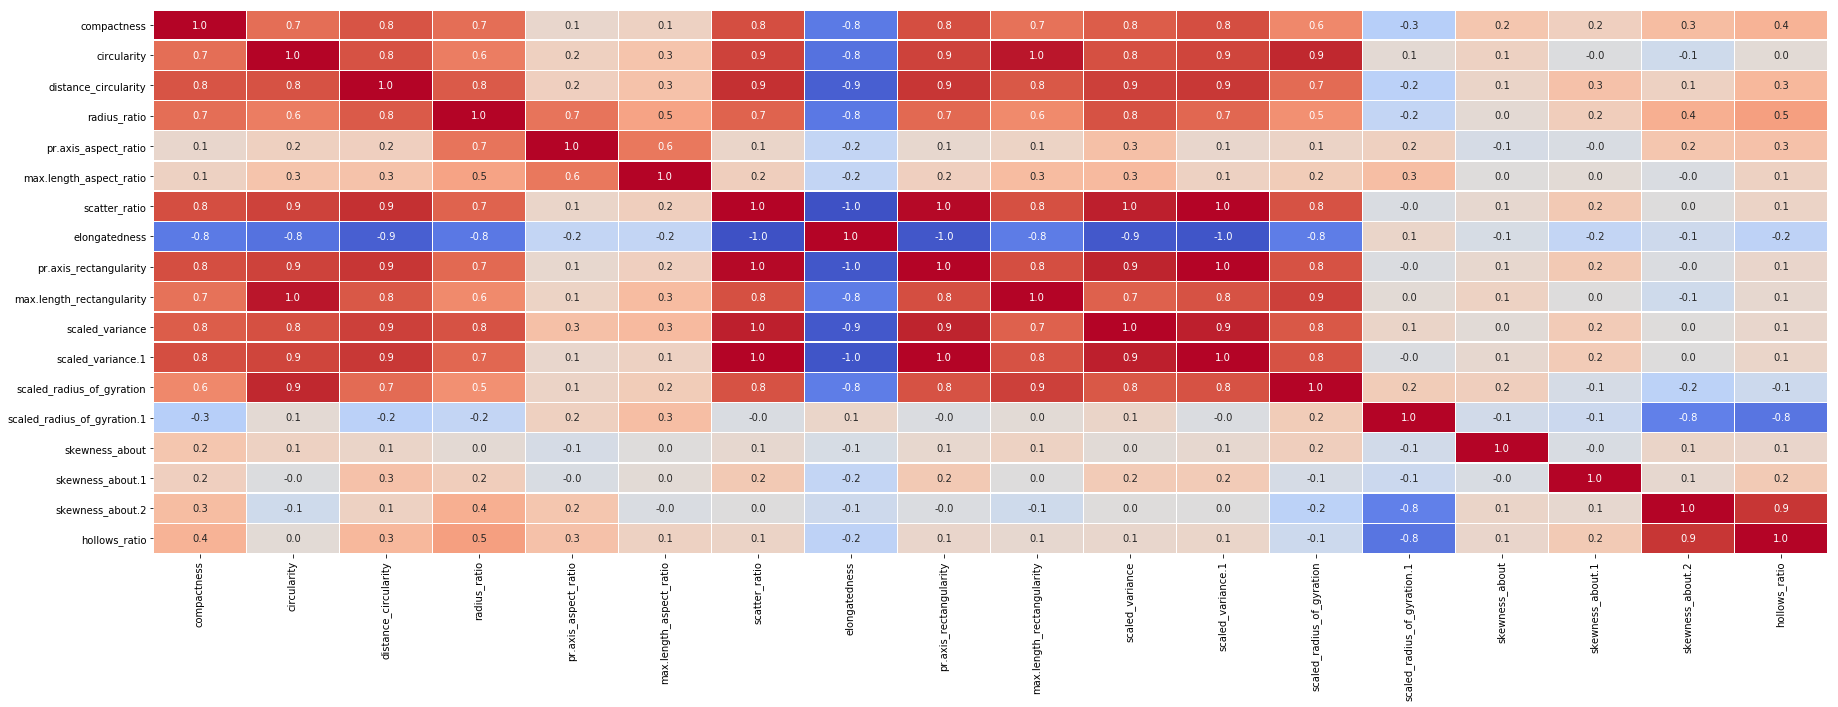

In [184]:
# check correlation between attributes
corr = data_veh.corr()
plt.subplots(1,1,figsize=(30,10))
sns.heatmap(corr,annot=True,cmap='coolwarm', vmin=-1, vmax=1, fmt='.1f',linewidths=.5,center=0,cbar=False)

There are many pairs with perfect positive correlation of 1.0 and there are many pairs with perfect negative correlation -1.0

In [185]:
# 7 point description
data_veh.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

##### Except for scaled_variance.1, there is not much difference between mean and median values for other columns.

In [186]:
# Lets replace null with median values in these 33 rows.
p_data=data_veh.copy()
p_data.fillna(p_data.median(),inplace=True) #replace null with median values
p_data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

<b> 2.EDA and visualisation: </b> Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods. 
For example: Use your best analytical approach to build this report. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns.

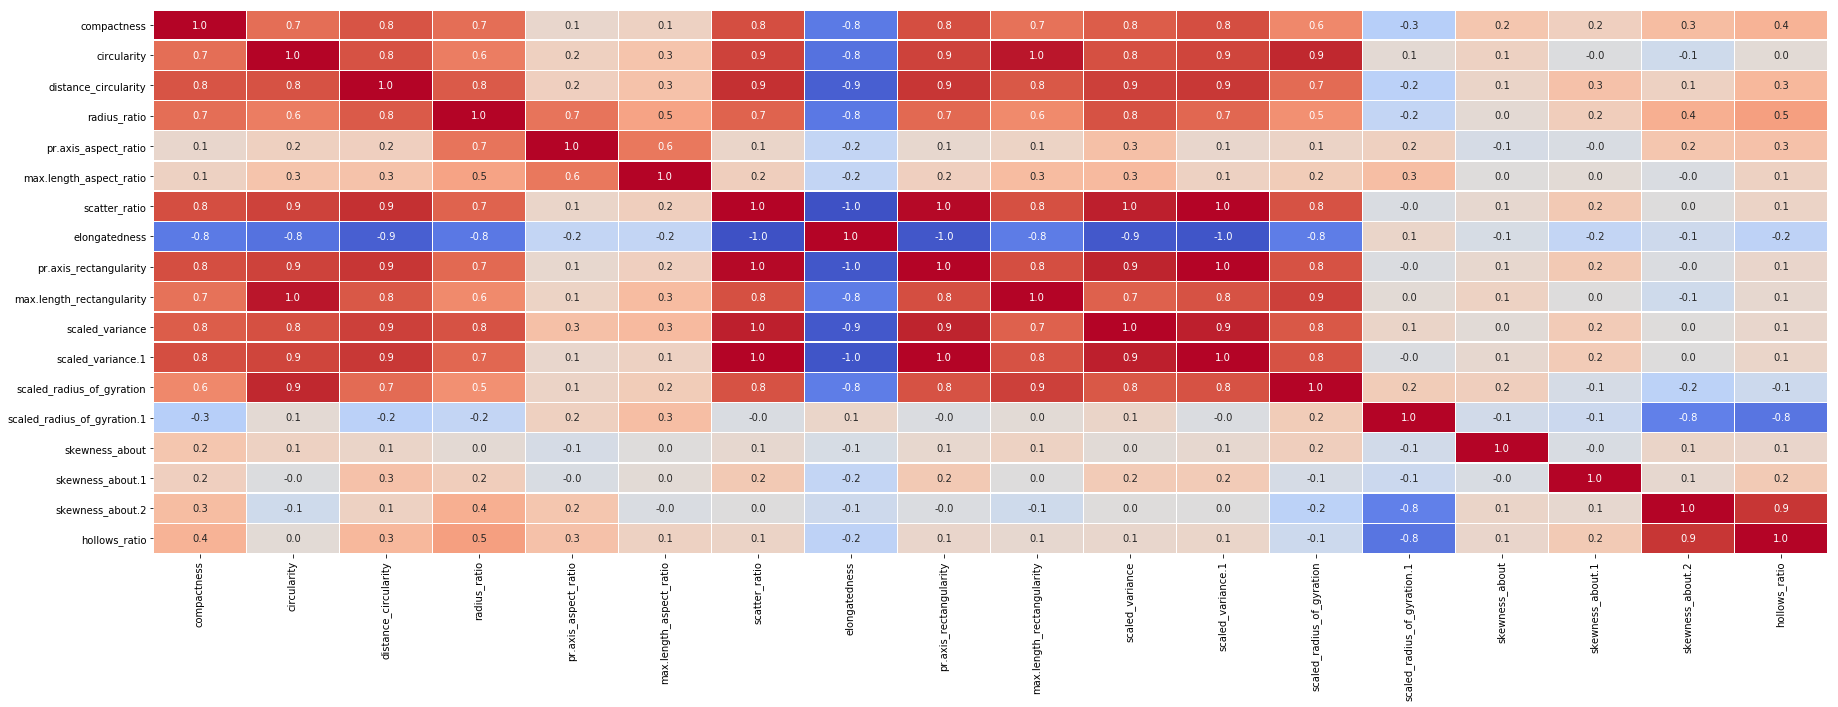

In [187]:
plt.subplots(1,1,figsize=(30,10))
sns.heatmap(corr,annot=True,cmap='coolwarm', vmin=-1, vmax=1, fmt='.1f',linewidths=.5,center=0,cbar=False)

1.Circularity has perfect positive correlation with max.length rectangularity
<br>
2.scatter_ratio and elongatedness are perfect negatively correlated
<br>
3.scatter_ratio and scaled_variance, scaled_variance.1,pr.axis_rectangularity are perfect positive correlated
<br>
4.Data reflects high correlation between features

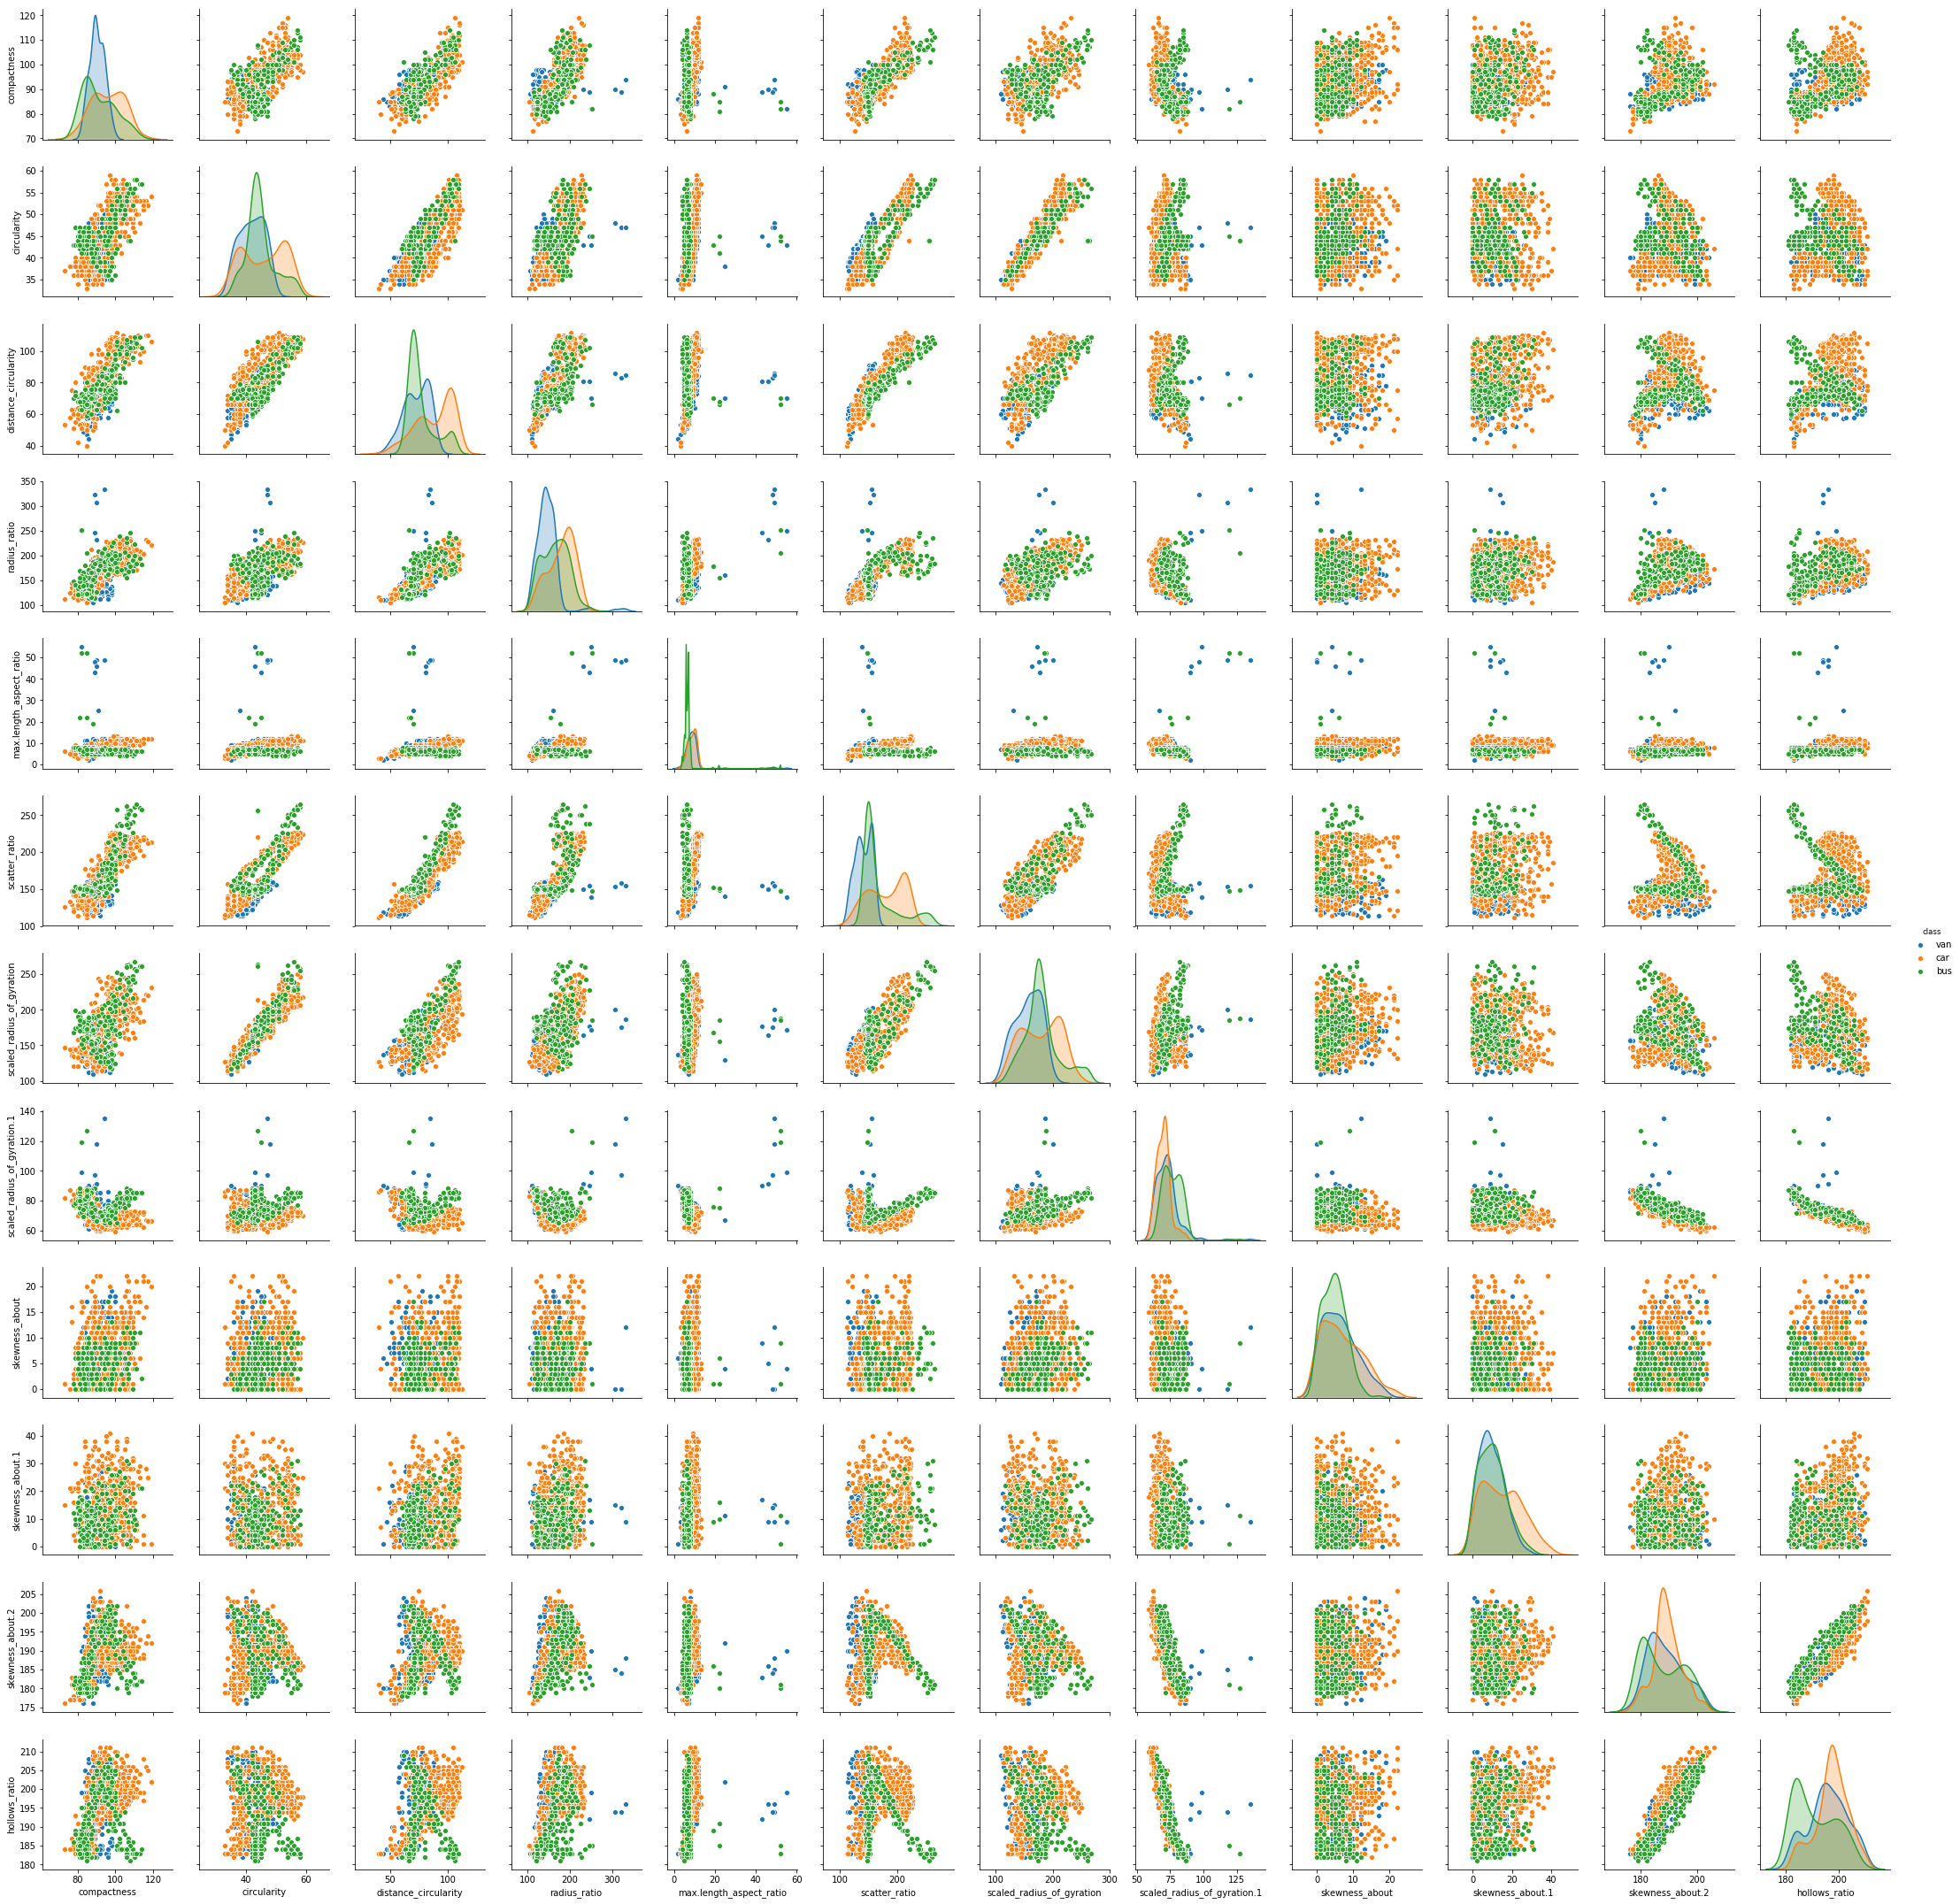

In [188]:
sns.pairplot(p_data[['compactness','circularity','distance_circularity','radius_ratio','max.length_aspect_ratio','scatter_ratio','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio','class']], diag_kind= 'kde', hue='class')

1. Outliers visible in many features mainly belonging to Vans and some outliers are there for Buses.

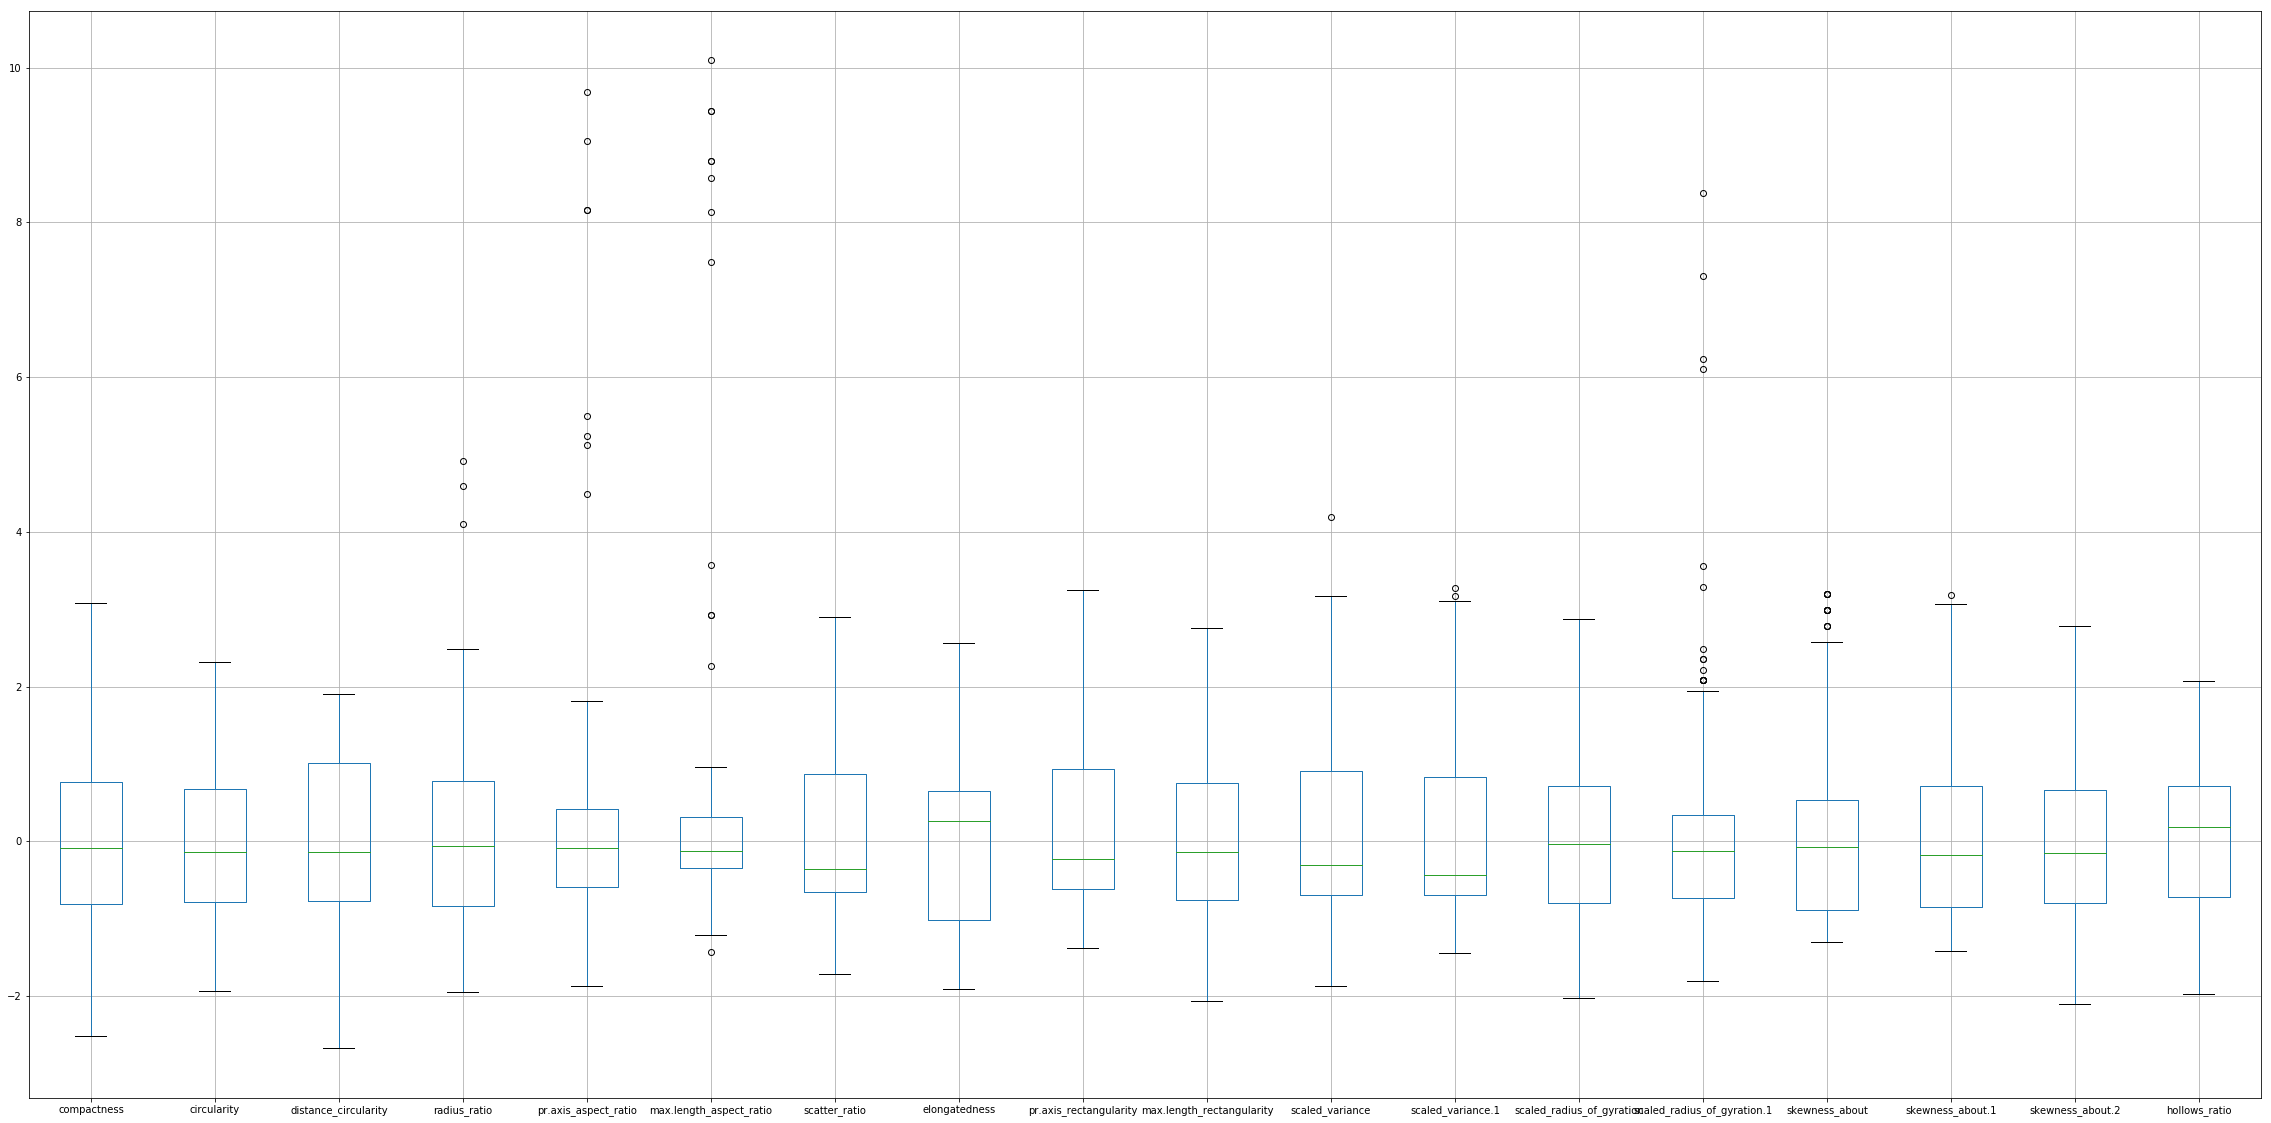

In [189]:
# check boxplot for numeric columns after scaling

cols = list(p_data.columns)
cols.remove('class')

p_data_scaled = pd.DataFrame()
p_data_scaled[cols] = p_data[cols].apply(zscore) #scale data

plt.figure(figsize=(40, 20))
p_data_scaled.boxplot()

In [190]:
# check number of outliers across columns using Inter quartile range
for i in cols:
    upper_fence = p_data[i].quantile(0.75) + 1.5*(p_data[i].quantile(0.75)-p_data[i].quantile(0.25))
    lower_fence = p_data[i].quantile(0.25) - 1.5*(p_data[i].quantile(0.75)-p_data[i].quantile(0.25))
    print(i,":","Count greater than upper fence:",(p_data[i]>upper_fence).sum())
    print(i,":","Count lower than lower fence:",(p_data[i]<lower_fence).sum())

compactness : Count greater than upper fence: 0
compactness : Count lower than lower fence: 0
circularity : Count greater than upper fence: 0
circularity : Count lower than lower fence: 0
distance_circularity : Count greater than upper fence: 0
distance_circularity : Count lower than lower fence: 0
radius_ratio : Count greater than upper fence: 3
radius_ratio : Count lower than lower fence: 0
pr.axis_aspect_ratio : Count greater than upper fence: 8
pr.axis_aspect_ratio : Count lower than lower fence: 0
max.length_aspect_ratio : Count greater than upper fence: 12
max.length_aspect_ratio : Count lower than lower fence: 1
scatter_ratio : Count greater than upper fence: 0
scatter_ratio : Count lower than lower fence: 0
elongatedness : Count greater than upper fence: 0
elongatedness : Count lower than lower fence: 0
pr.axis_rectangularity : Count greater than upper fence: 0
pr.axis_rectangularity : Count lower than lower fence: 0
max.length_rectangularity : Count greater than upper fence: 0

radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about, skewness_about.1 columns have outliers

In [191]:
# check median data by 'class' to see how the values are for each of the class
p_data.groupby(['class']).median()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus             89         44.0                  73.0         167.0   
car             97         46.0                  94.0         186.0   
van             90         42.0                  75.0         144.0   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                    64.0                        6          152.0   
car                    61.0                        9          185.0   
van                    59.0                        9          142.0   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus             44.0                    19.0                        145   
car             36.0                    22.0                        150   
van             47.0                    18.0                        145   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus              177.0              344.0                      176.0   
car              206.0              511.0                      182.0   
van              164.0              300.0                      159.0   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                           76.0             5.0              10.0   
car                           70.0             6.0              14.0   
van                           72.0             6.0               9.0   

       skewness_about.2  hollows_ratio  
class                                   
bus               186.0            189  
car               189.0            198  
van               188.0            196

1. car's median value for scaled_variance.1 and skewness_about.1 are quite high. 
2. Bus's median value for max.length_aspect_ratio looks lower than other classes.
3. Van's median value for scaled_variance.1 and skewness_about.1 are low.

In [192]:
le = LabelEncoder()
p_data['class'] = le.fit_transform(p_data['class'])
p_data.groupby(['class']).size() # check target balancing

class
0    218
1    429
2    199
dtype: int64

<b> 3. Classifier: </b> Design and train a best fit SVM classier using all the data attributes.

In [193]:
p_data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [208]:
# dependent variable
y = p_data['class']

# independent variable
x = p_data[['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'skewness_about.1','skewness_about.2', 'hollows_ratio', 'pr.axis_aspect_ratio',
       'max.length_aspect_ratio', 'scaled_radius_of_gyration.1','skewness_about']]


# Perform train_test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10,stratify=y)
print("Training Class splits\n Total: {0:4d} \n Churn[0]: ({1:.2f})% \n Churn[1]: ({2:.2f})%".format(len(y_train),((y_train==0).sum()/len(y_train))*100,((y_train==1).sum()/len(y_train))*100))
print("Testing Class splits\n Total:  {0:4d} \n Churn[0]: ({1:.2f})% \n Churn[1]: ({2:.2f})%".format(len(y_test),((y_test==0).sum()/len(y_test))*100,((y_test==1).sum()/len(y_test))*100))
print("Input data Class splits\n Total: {0:4d} \n Churn[0]: ({1:.2f})% \n Churn[1]: ({2:.2f})%".format(len(y),((y==0).sum()/len(y))*100,((y==1).sum()/len(y))*100))

Training Class splits
 Total:  592 
 Churn[0]: (25.84)% 
 Churn[1]: (50.68)%
Testing Class splits
 Total:   254 
 Churn[0]: (25.59)% 
 Churn[1]: (50.79)%
Input data Class splits
 Total:  846 
 Churn[0]: (25.77)% 
 Churn[1]: (50.71)%


In [209]:
# Apply PowerTransformer to data and handle outliers. Transformation done only to columns with many outliers on training dataset
# and then applied to testing dataset

pt=PowerTransformer()
x_train['pt_pr.axis_aspect_ratio'] = pt.fit_transform(np.array(x_train['pr.axis_aspect_ratio']).reshape(-1,1))
x_test['pt_pr.axis_aspect_ratio'] = pt.transform(np.array(x_test['pr.axis_aspect_ratio']).reshape(-1,1))

x_train['pt_max.length_aspect_ratio'] = pt.fit_transform(np.array(x_train['max.length_aspect_ratio']).reshape(-1,1))
x_test['pt_max.length_aspect_ratio'] = pt.transform(np.array(x_test['max.length_aspect_ratio']).reshape(-1,1))

x_train['pt_scaled_radius_of_gyration.1'] = pt.fit_transform(np.array(x_train['scaled_radius_of_gyration.1']).reshape(-1,1))
x_test['pt_scaled_radius_of_gyration.1'] = pt.transform(np.array(x_test['scaled_radius_of_gyration.1']).reshape(-1,1))

x_train['pt_skewness_about'] = pt.fit_transform(np.array(x_train['skewness_about']).reshape(-1,1))
x_test['pt_skewness_about'] = pt.transform(np.array(x_test['skewness_about']).reshape(-1,1))

In [210]:
# drop the columns with big outliers as we will use transformed features for those
x_train.drop(columns=['pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1','skewness_about'],inplace=True)
x_test.drop(columns=['pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1','skewness_about'],inplace=True)
x_train.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
794           87         41.0                  76.0         165.0   
823          105         54.0                 105.0         213.0   
330           98         44.0                  78.0         160.0   
634           81         38.0                  53.0         123.0   
599           93         39.0                  63.0         146.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  \
794          148.0           45.0                    19.0   
823          200.0           33.0                    23.0   
330          142.0           47.0                    18.0   
634          134.0           51.0                    18.0   
599          128.0           52.0                    18.0   

     max.length_rectangularity  scaled_variance  scaled_variance.1  \
794                        140            171.0              327.0   
823                        163            214.0              597.0   
330                        148            160.0              300.0   
634                        128            147.0              259.0   
599                        134            149.0              246.0   

     scaled_radius_of_gyration  skewness_about.1  skewness_about.2  \
794                      152.0              13.0             188.0   
823                      214.0              20.0             190.0   
330                      171.0               2.0             201.0   
634                      148.0               6.0             177.0   
599                      158.0               7.0             198.0   

     hollows_ratio  pt_pr.axis_aspect_ratio  pt_max.length_aspect_ratio  \
794            195                 0.948257                   -0.347198   
823            198                 0.948257                    0.821760   
330            207                 0.389679                    0.105621   
634            184                -0.461466                   -0.891747   
599            204                -0.461466                   -0.347198   

     pt_scaled_radius_of_gyration.1  pt_skewness_about  
794                        0.130222           0.315541  
823                       -0.561273           0.820942  
330                       -1.660302           1.963293  
634                        1.464854           0.820942  
599                       -1.660302           0.662848

In [211]:
#scale input variables
scale = StandardScaler()

# fit with train data
xs_train = pd.DataFrame(scale.fit_transform(x_train), columns=x_train.columns)

# apply mean and std.dev of train data to test data using transform
xs_test = pd.DataFrame(scale.transform(x_test), columns=x_train.columns)

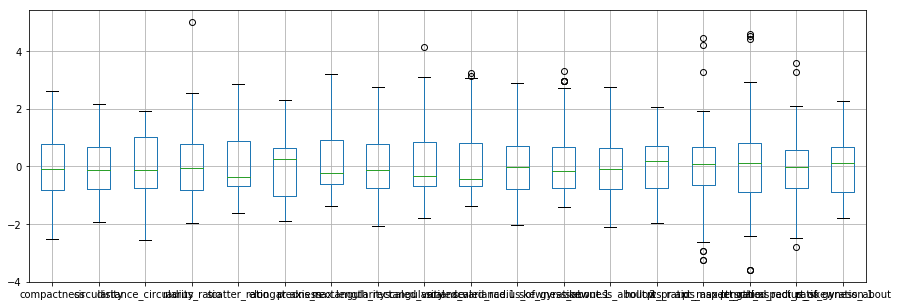

In [212]:
# check outlier distribution  after transformation
plt.figure(figsize=(15, 5))
xs_train.boxplot()

##### Distribution is better compared to before

In [216]:
# Use synthetic data on scaled variables
sm = SMOTE(random_state=1) # call SMOTE to resample minority classes in the training dataset
xs_r_train, ys_r_train = sm.fit_resample(xs_train, y_train)
print('Resampled dataset shape %s' % Counter(ys_r_train))

Resampled dataset shape Counter({0: 300, 1: 300, 2: 300})


In [202]:
#tuning SVM for scaled data
# #SVM
C=np.logspace(-3, 2, 6)
gamma =np.logspace(-3, 2, 6)
kernel = ['linear','rbf']

sv = svm.SVC(class_weight = 'balanced',random_state=1)
param_grid = dict(C=C, gamma=gamma, kernel = kernel)    # define parameter grid based on these parameters
sv_grid = GridSearchCV(sv,param_grid, cv=5, scoring='accuracy',n_jobs=-1) # finding best parameters using gridsearch
sv_grid.fit(xs_train, y_train) # fit the model

#find best parameters
print(sv_grid.best_score_)
print(sv_grid.best_params_)

0.964506480558325
{'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'}


In [203]:
#tuning SVM for scaled data which has synthetic upsampling
# #SVM
C=np.logspace(-3, 2, 6)
gamma =np.logspace(-3, 2, 6)
kernel = ['linear','rbf']

sv_sm = svm.SVC(random_state=1)
param_grid = dict(C=C, gamma=gamma, kernel = kernel)    # define parameter grid based on these parameters
sv_sm_grid = GridSearchCV(sv_sm,param_grid, cv=5, scoring='accuracy',n_jobs=-1) # finding best parameters using gridsearch
sv_sm_grid.fit(xs_r_train, ys_r_train) # fit the model

#find best parameters
print(sv_sm_grid.best_score_)
print(sv_sm_grid.best_params_)

0.9888888888888889
{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}


In [217]:
# Fit SVM model  using scaled data on the optimal parameters found using gridsearch
start_time = time.time()
model = svm.SVC(C=100,gamma=0.1,kernel='rbf',class_weight = 'balanced')
model.fit(xs_train, y_train)
y_pred = model.predict(xs_test)
print(classification_report(y_test,y_pred),confusion_matrix(y_test,y_pred))
end_time = time.time()
total_time = end_time - start_time
print("total time taken:",total_time)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        65
           1       0.99      1.00      1.00       129
           2       0.97      0.97      0.97        60

    accuracy                           0.98       254
   macro avg       0.98      0.98      0.98       254
weighted avg       0.98      0.98      0.98       254
 [[ 63   0   2]
 [  0 129   0]
 [  1   1  58]]
total time taken: 0.02396392822265625


In [218]:
# Fit SVM model using scaled synthetic data on the optimal parameters found using gridsearch
model1 = svm.SVC(C=100,gamma=0.1,kernel='rbf')
model1.fit(xs_r_train, ys_r_train)
y_pred = model1.predict(xs_test)
print(classification_report(y_test,y_pred),confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        65
           1       0.99      1.00      1.00       129
           2       0.97      0.97      0.97        60

    accuracy                           0.98       254
   macro avg       0.98      0.98      0.98       254
weighted avg       0.98      0.98      0.98       254
 [[ 63   0   2]
 [  0 129   0]
 [  1   1  58]]


#####  Test accuracies look similar. Use actual data and not synthesised data.

<b> 4. Dimensional reduction: </b> perform dimensional reduction on the data.

In [219]:
# Use PCA for dimensionality reduction
covMatrix = np.cov(xs_train,rowvar=False)
covMatrix.shape

(18, 18)

In [220]:
pca = PCA(n_components=len(x.columns))
x_pca_train = pca.fit_transform(xs_train)

In [221]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[9.64128707e+00 3.36051714e+00 1.21853295e+00 1.14184971e+00
 8.87960294e-01 7.35257473e-01 3.58252500e-01 2.12161712e-01
 1.26609624e-01 9.47511265e-02 6.89175414e-02 5.51896971e-02
 4.23403451e-02 3.13171228e-02 2.18152728e-02 2.02728475e-02
 1.14379822e-02 1.98644510e-03]
[5.34722284e-01 1.86380033e-01 6.75819232e-02 6.33289393e-02
 4.92477978e-02 4.07786380e-02 1.98692969e-02 1.17668517e-02
 7.02198646e-03 5.25505966e-03 3.82228481e-03 3.06091507e-03
 2.34826802e-03 1.73690124e-03 1.20991237e-03 1.12436682e-03
 6.34370071e-04 1.10171646e-04]


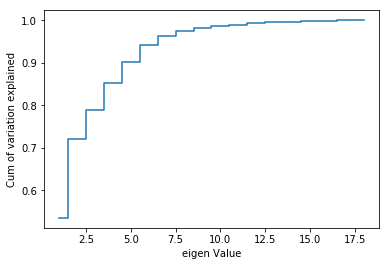

In [222]:
plt.step(list(range(1,len(x.columns)+1)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [223]:
x_pca_test = pca.transform(xs_test) #transform the test data

In [224]:
x_pca_test[:,:7] #first 7 features explain 96% variance

array([[-0.15665277, -0.15663449, -1.55123147, ..., -0.58833068,
         1.66073419,  0.0718681 ],
       [-3.47102921,  2.2365916 ,  0.88726649, ..., -1.21387993,
        -0.13586753,  0.79032802],
       [ 4.61058964,  0.4491596 , -0.46334372, ...,  0.13708526,
        -0.57623888, -0.69883966],
       ...,
       [-2.65163728, -2.20156079,  3.17528984, ...,  0.23170351,
         0.79906669, -0.80250485],
       [-2.97099759,  0.81025583, -0.09392855, ..., -0.57107207,
         0.27613468, -0.4498211 ],
       [-3.91233979, -3.20987175, -0.79879417, ..., -0.12956422,
        -0.71702016, -0.82482194]])

##### 7 features explain 96% of variance. Lets use top 7 features to build SVC model

<b>5. Classifier: </b> Design and train a best fit SVM classier using dimensionally reduced attributes.

In [225]:
start_time = time.time()
model = svm.SVC(C=100,gamma=0.1,kernel='rbf',class_weight = 'balanced')
model.fit(x_pca_train[:,:7], y_train)
y_pred = model.predict(x_pca_test[:,:7])
print(classification_report(y_test,y_pred),confusion_matrix(y_test,y_pred))
end_time = time.time()
total_time = end_time - start_time
print("total time taken:",total_time)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        65
           1       0.94      0.92      0.93       129
           2       0.87      0.87      0.87        60

    accuracy                           0.91       254
   macro avg       0.89      0.90      0.90       254
weighted avg       0.91      0.91      0.91       254
 [[ 59   4   2]
 [  4 119   6]
 [  5   3  52]]
total time taken: 0.05297112464904785


##### 91% accuracy using 7 features vs. 98% accuracy using all 18 features. 

<b> 6. Conclusion: </b> Showcase key pointer on how dimensional reduction helped in this case.

1. Dimensionality reduction helped in capturing top 95% variance using just 7 features. Building a model using just 7 features took very less time
2. PCA helps solve curse of dimensionality and it can also save memory if only 7 features are stored. 
3. Trade-off is a slight drop in accuracy. if we use top 10 features, accuracy is as close to 98%.

# PART - FOUR

<b> DOMAIN: </b> Sports management

<b> CONTEXT: </b> Company X is a sports management company for international cricket.

<b> DATA DESCRIPTION: </b> The data is collected belongs to batsman from IPL series conducted so far. Attribute Information:
1. Runs: Runs score by the batsman
2. Ave: Average runs scored by the batsman per match
3. SR: strike rate of the batsman
4. Fours: number of boundary/four scored
5. Six: number of boundary/six scored
6. HF: number of half centuries scored so far

<b> PROJECT OBJECTIVE: </b> Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.

##### Steps and tasks:

##### 1. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.

In [226]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.decomposition import PCA

from plotly import offline
import plotly.express as px

In [227]:
# read input
data_ipl = pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")
data_ipl.shape,data_ipl.info() # check input data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
Name     90 non-null object
Runs     90 non-null float64
Ave      90 non-null float64
SR       90 non-null float64
Fours    90 non-null float64
Sixes    90 non-null float64
HF       90 non-null float64
dtypes: float64(6), object(1)
memory usage: 9.9+ KB


((180, 7), None)

In [228]:
# data has 180 rows and 7 columns
data_ipl.sample(10)

Name   Runs    Ave      SR  Fours  Sixes   HF
135       PP Chawla  106.0  13.25  120.45    9.0    4.0  0.0
100             NaN    NaN    NaN     NaN    NaN    NaN  NaN
51         SE Marsh  336.0  30.54  120.00   39.0    7.0  2.0
26              NaN    NaN    NaN     NaN    NaN    NaN  NaN
153  A Ashish Reddy   35.0   8.75  120.68    3.0    1.0  0.0
173      WD Parnell   19.0   4.75   70.37    2.0    0.0  0.0
72              NaN    NaN    NaN     NaN    NaN    NaN  NaN
41         DR Smith  157.0  39.25  160.20   18.0    7.0  1.0
128             NaN    NaN    NaN     NaN    NaN    NaN  NaN
174             NaN    NaN    NaN     NaN    NaN    NaN  NaN

In [229]:
data_ipl.isnull().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [5]:
data_ipl[data_ipl.isnull().sum(axis=1)>0]

Name  Runs  Ave  SR  Fours  Sixes  HF
0    NaN   NaN  NaN NaN    NaN    NaN NaN
2    NaN   NaN  NaN NaN    NaN    NaN NaN
4    NaN   NaN  NaN NaN    NaN    NaN NaN
6    NaN   NaN  NaN NaN    NaN    NaN NaN
8    NaN   NaN  NaN NaN    NaN    NaN NaN
10   NaN   NaN  NaN NaN    NaN    NaN NaN
12   NaN   NaN  NaN NaN    NaN    NaN NaN
14   NaN   NaN  NaN NaN    NaN    NaN NaN
16   NaN   NaN  NaN NaN    NaN    NaN NaN
18   NaN   NaN  NaN NaN    NaN    NaN NaN
20   NaN   NaN  NaN NaN    NaN    NaN NaN
22   NaN   NaN  NaN NaN    NaN    NaN NaN
24   NaN   NaN  NaN NaN    NaN    NaN NaN
26   NaN   NaN  NaN NaN    NaN    NaN NaN
28   NaN   NaN  NaN NaN    NaN    NaN NaN
30   NaN   NaN  NaN NaN    NaN    NaN NaN
32   NaN   NaN  NaN NaN    NaN    NaN NaN
34   NaN   NaN  NaN NaN    NaN    NaN NaN
36   NaN   NaN  NaN NaN    NaN    NaN NaN
38   NaN   NaN  NaN NaN    NaN    NaN NaN
40   NaN   NaN  NaN NaN    NaN    NaN NaN
42   NaN   NaN  NaN NaN    NaN    NaN NaN
44   NaN   NaN  NaN NaN    NaN    NaN NaN
46   NaN   NaN  NaN NaN    NaN    NaN NaN
48   NaN   NaN  NaN NaN    NaN    NaN NaN
50   NaN   NaN  NaN NaN    NaN    NaN NaN
52   NaN   NaN  NaN NaN    NaN    NaN NaN
54   NaN   NaN  NaN NaN    NaN    NaN NaN
56   NaN   NaN  NaN NaN    NaN    NaN NaN
58   NaN   NaN  NaN NaN    NaN    NaN NaN
..   ...   ...  ...  ..    ...    ...  ..
120  NaN   NaN  NaN NaN    NaN    NaN NaN
122  NaN   NaN  NaN NaN    NaN    NaN NaN
124  NaN   NaN  NaN NaN    NaN    NaN NaN
126  NaN   NaN  NaN NaN    NaN    NaN NaN
128  NaN   NaN  NaN NaN    NaN    NaN NaN
130  NaN   NaN  NaN NaN    NaN    NaN NaN
132  NaN   NaN  NaN NaN    NaN    NaN NaN
134  NaN   NaN  NaN NaN    NaN    NaN NaN
136  NaN   NaN  NaN NaN    NaN    NaN NaN
138  NaN   NaN  NaN NaN    NaN    NaN NaN
140  NaN   NaN  NaN NaN    NaN    NaN NaN
142  NaN   NaN  NaN NaN    NaN    NaN NaN
144  NaN   NaN  NaN NaN    NaN    NaN NaN
146  NaN   NaN  NaN NaN    NaN    NaN NaN
148  NaN   NaN  NaN NaN    NaN    NaN NaN
150  NaN   NaN  NaN NaN    NaN    NaN NaN
152  NaN   NaN  NaN NaN    NaN    NaN NaN
154  NaN   NaN  NaN NaN    NaN    NaN NaN
156  NaN   NaN  NaN NaN    NaN    NaN NaN
158  NaN   NaN  NaN NaN    NaN    NaN NaN
160  NaN   NaN  NaN NaN    NaN    NaN NaN
162  NaN   NaN  NaN NaN    NaN    NaN NaN
164  NaN   NaN  NaN NaN    NaN    NaN NaN
166  NaN   NaN  NaN NaN    NaN    NaN NaN
168  NaN   NaN  NaN NaN    NaN    NaN NaN
170  NaN   NaN  NaN NaN    NaN    NaN NaN
172  NaN   NaN  NaN NaN    NaN    NaN NaN
174  NaN   NaN  NaN NaN    NaN    NaN NaN
176  NaN   NaN  NaN NaN    NaN    NaN NaN
178  NaN   NaN  NaN NaN    NaN    NaN NaN

[90 rows x 7 columns]

In [230]:
# looks all values in 90 rows are null. 
data_ipl.dropna(axis=0,inplace=True)

In [231]:
data_ipl.shape

(90, 7)

In [232]:
# check for duplicates
data_ipl.drop_duplicates(inplace=True)
data_ipl.shape

(90, 7)

In [233]:
data_ipl.sample(10)

Name   Runs    Ave      SR  Fours  Sixes   HF
35      AT Rayudu  333.0  37.00  132.14   21.0   14.0  2.0
171        Z Khan   12.0   6.00   70.58    1.0    0.0  0.0
145      R Bhatia   35.0  11.66  125.00    4.0    0.0  0.0
11      AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0
59     MA Agarwal  225.0  20.45  142.40   19.0   15.0  1.0
79   AC Gilchrist  172.0  34.40  120.27   21.0    4.0  1.0
93      MK Tiwary  260.0  26.00  105.69   21.0    3.0  1.0
57        V Kohli  364.0  28.00  111.65   33.0    9.0  2.0
165       B Kumar   40.0  13.33  100.00    4.0    0.0  0.0
177      RP Singh    6.0   3.00   50.00    0.0    0.0  0.0

In [234]:
# 7 point analysis
data_ipl.describe()

Runs        Ave          SR      Fours      Sixes         HF
count   90.000000  90.000000   90.000000  90.000000  90.000000  90.000000
mean   219.933333  24.729889  119.164111  19.788889   7.577778   1.188889
std    156.253669  13.619215   23.656547  16.399845   8.001373   1.688656
min      2.000000   0.500000   18.180000   0.000000   0.000000   0.000000
25%     98.000000  14.665000  108.745000   6.250000   3.000000   0.000000
50%    196.500000  24.440000  120.135000  16.000000   6.000000   0.500000
75%    330.750000  32.195000  131.997500  28.000000  10.000000   2.000000
max    733.000000  81.330000  164.100000  73.000000  59.000000   9.000000

##### Data has players with various degress of calibre - ranging from average 0.5 till 81.3

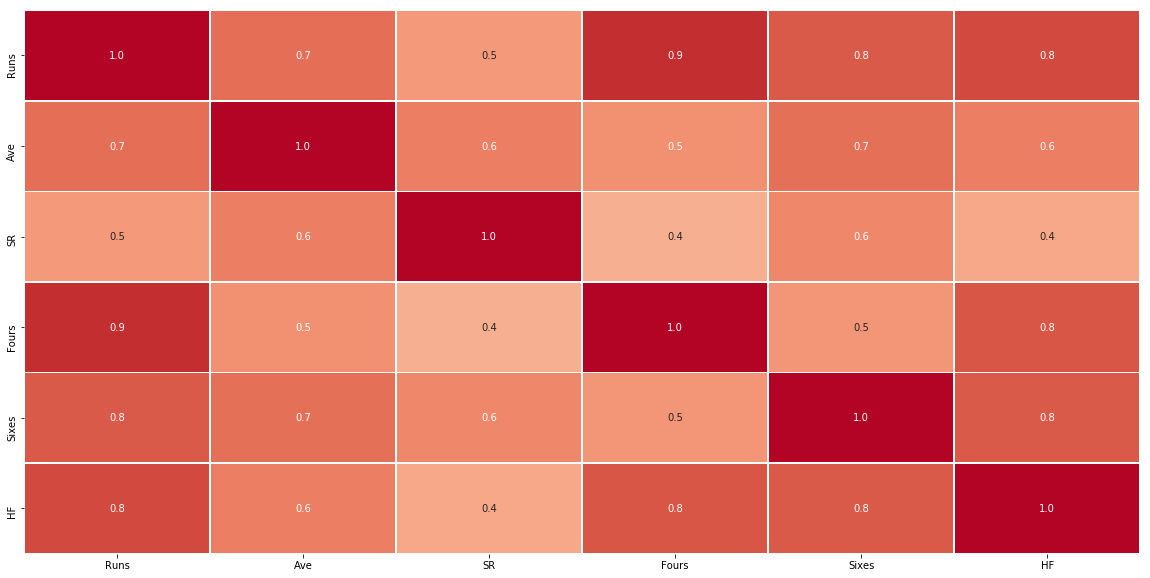

In [235]:
# check correlation between attributes
corr = data_ipl.corr()
plt.subplots(1,1,figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm', vmin=-1, vmax=1, fmt='.1f',linewidths=.5,center=0,cbar=False)

##### Strong positive correlation exists between multiple features

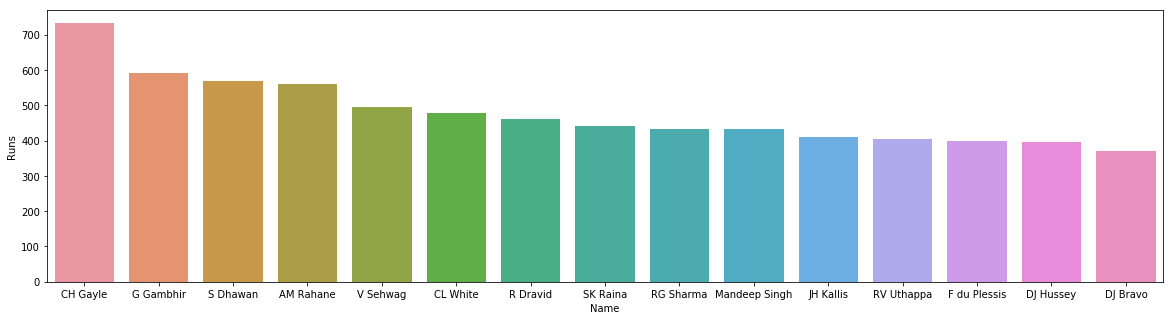

In [244]:
df=data_ipl[['Name','Runs']].sort_values(by= 'Runs',ascending=False).head(15)
plt.subplots(1,1,figsize=(20,5))
sns.barplot(df['Name'],df['Runs'])

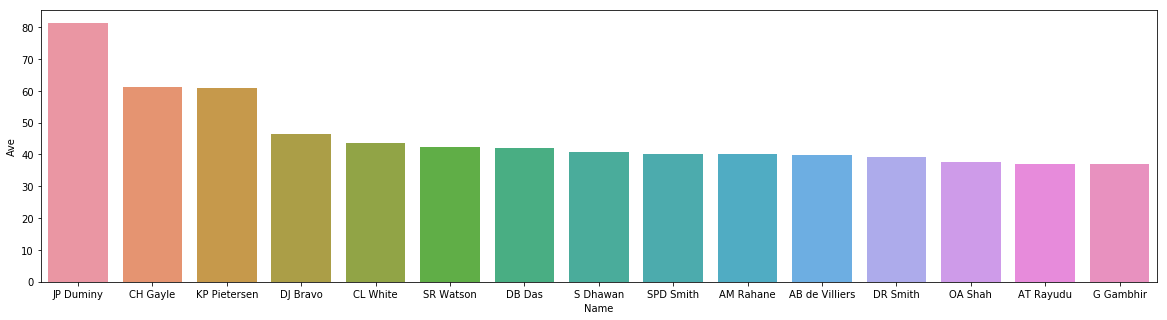

In [245]:
df=data_ipl[['Name','Ave']].sort_values(by= 'Ave',ascending=False).head(15)
plt.subplots(1,1,figsize=(20,5))
sns.barplot(df['Name'],df['Ave'])

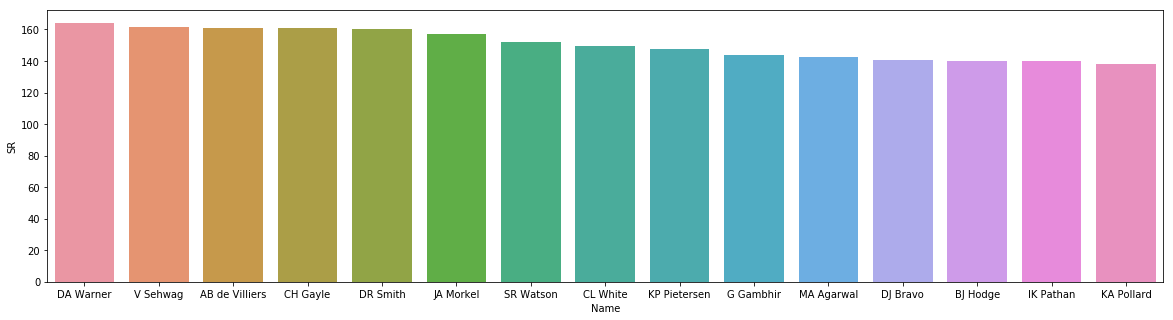

In [246]:
df=data_ipl[['Name','SR']].sort_values(by= 'SR',ascending=False).head(15)
plt.subplots(1,1,figsize=(20,5))
sns.barplot(df['Name'],df['SR'])

A player can have high average and SR but not many runs, if he had played only in very few matches.
<br>
<b> CH Gayle, G Gambhir, CL White and DJ Bravo appear in all 3 analysis in the top 15. </b>

In [247]:
# plot 2 by 2 matrix to see the good players

offline.init_notebook_mode() # require this for graphs to appear while exporting into .html
# Plot bubble chart 

median_average = data_ipl['Ave'].median()
median_SR = data_ipl['SR'].median() 

fig = px.scatter(data_frame = data_ipl, x='Ave', y='SR',
                 hover_name='Name',size='Runs',labels=dict(Ave='Batting average', SR='Strike rate')
                )
fig.add_shape(type='line',
    x0=median_average, y0=0, x1=median_average, y1=180,
    line=dict(color="green",width=2)
)
fig.add_shape(type='line',
    x0=-10, y0=median_SR, x1=data_ipl['Ave'].max()+10, y1=median_SR,
    line=dict(color="green",width=2)
)
fig.show()
# lines cut at medians, size of bubble = Runs scored

##### CH Gayle, 'KP Pietersen', 'JP Duminy' appear in the top right quadrant as extreme values. However, we didnt see Pietersen and Duminy in top run scorers

In [248]:
data_ipl[(data_ipl['Name'] == 'KP Pietersen') | (data_ipl['Name'] == 'JP Duminy')]

Name   Runs    Ave      SR  Fours  Sixes   HF
13  KP Pietersen  305.0  61.00  147.34   22.0   20.0  3.0
19     JP Duminy  244.0  81.33  128.42   13.0   11.0  2.0

##### This could be because of number of matches played by these 2. It could be less than others in top run scoring category. 

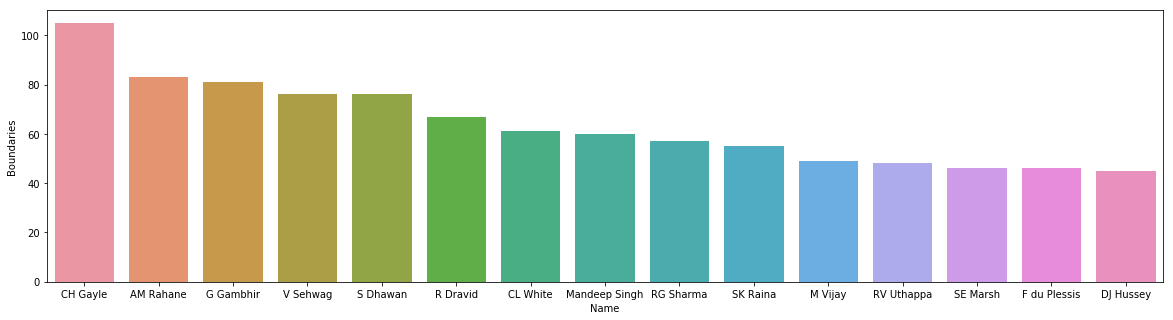

In [255]:
data_ipl['Boundaries']=data_ipl['Fours'] + data_ipl['Sixes']
df=data_ipl.sort_values(by='Boundaries',ascending=False).head(15)
plt.subplots(1,1,figsize=(20,5))
sns.barplot(df['Name'],df['Boundaries'])

##### CH Gayle, AM Rahane, G Gambhir, V Sehwag and S Dhawan have hit most number of fours and sixes

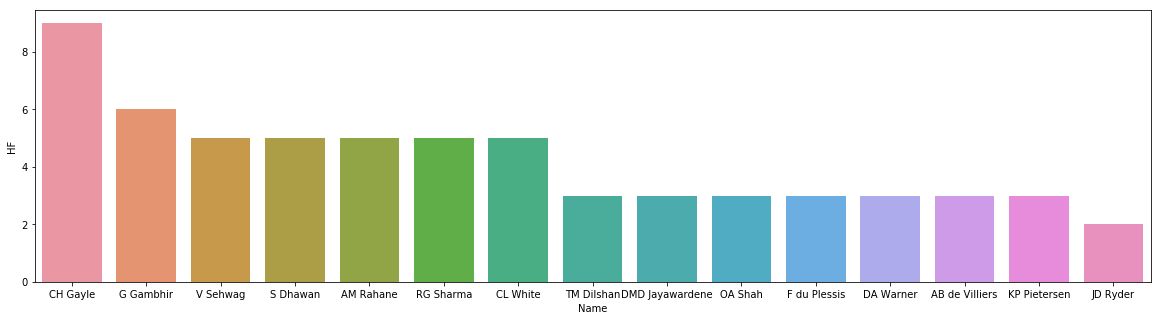

In [251]:
df=data_ipl[['Name','HF']].sort_values(by= 'HF',ascending=False).head(15)
plt.subplots(1,1,figsize=(20,5))
sns.barplot(df['Name'],df['HF'])

##### CH Gayle, G Gambhir, V Sehwag , S Dhawan and AM Rahane have also scored most number of half centuries

In [257]:
data_ipl.drop(columns=['Boundaries'],inplace=True) # drop boundaries. not required any more

In [258]:
data_ipl.info(),data_ipl.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
Name     90 non-null object
Runs     90 non-null float64
Ave      90 non-null float64
SR       90 non-null float64
Fours    90 non-null float64
Sixes    90 non-null float64
HF       90 non-null float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


(None, (90, 7))

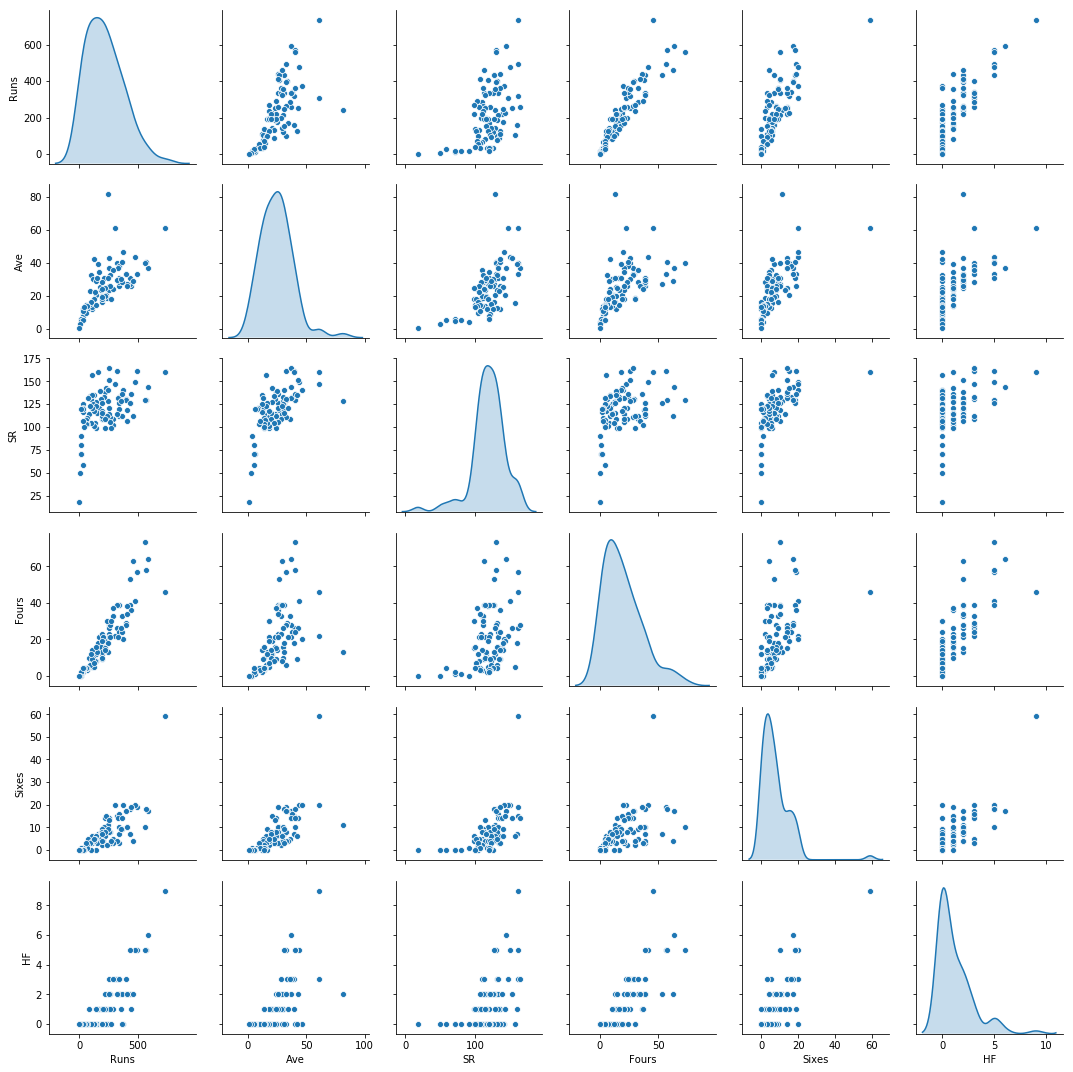

In [259]:
# pairplot to check relationships 
sns.pairplot(data_ipl, diag_kind= 'kde')

1. 'SR' is more left skewing, While 'Ave', 'Fours', 'Sixes', 'HF' are right skewing
2. Some features such as 'Runs', 'Ave', 'Fours' etc display linear relationship while 'SR' could have non-linear relationship with features such as 'Sixes' and 'Fours'


<b> EDA: Summary </b>

1. CH Gayle, G Gambhir, CL White and DJ Bravo have scored high runs and also have high average and strike rate. 
2. CH Gayle is the top run getter with aggressive strike rate and a good average
3. AM Rahane, G Gambhir, V Sehwag and S Dhawan have hit most number of 'Fours' and 'Sixes'. V Sehwag is not in the top 15 in terms of 'Ave'.
4. AM Rahane and S.Dhawan, while having scored lot of boundaries, interestingly have a strike rate that is not in the top 15.

##### 2. Build a data driven model to rank all the players in the dataset using all or the most important performance features.

In [263]:
# scale data before applying PCA
cols = data_ipl.drop('Name',axis=1).columns
data_ipl_scaled = pd.DataFrame()
data_ipl_scaled[cols] = data_ipl[cols].apply(zscore)
data_ipl_scaled.describe()

Runs           Ave            SR         Fours         Sixes  \
count  9.000000e+01  9.000000e+01  9.000000e+01  9.000000e+01  9.000000e+01   
mean  -2.467162e-18 -2.146431e-16  9.868649e-18  2.615192e-16 -2.467162e-18   
std    1.005602e+00  1.005602e+00  1.005602e+00  1.005602e+00  1.005602e+00   
min   -1.402554e+00 -1.789063e+00 -4.292674e+00 -1.213411e+00 -9.523654e-01   
25%   -7.847268e-01 -7.431614e-01 -4.428999e-01 -8.301747e-01 -5.753292e-01   
50%   -1.508100e-01 -2.140453e-02  4.127095e-02 -2.323263e-01 -1.982931e-01   
75%    7.131832e-01  5.512016e-01  5.455270e-01  5.034872e-01  3.044218e-01   
max    3.301945e+00  4.179184e+00  1.910153e+00  3.262788e+00  6.462679e+00   

                 HF  
count  9.000000e+01  
mean  -3.824102e-16  
std    1.005602e+00  
min   -7.079885e-01  
25%   -7.079885e-01  
50%   -4.102363e-01  
75%    4.830202e-01  
max    4.651551e+00

In [265]:
data_ipl_scaled.head(10) # index is not continuous. 

Runs       Ave        SR     Fours     Sixes        HF
1   3.301945  2.683984  1.767325  1.607207  6.462679  4.651551
3   2.381639  0.896390  1.036605  2.710928  1.184173  2.865038
5   1.770248  0.610640  1.788154  2.281703  1.435530  2.269533
7   1.667276  1.388883  1.297182  1.300618  1.561209  2.269533
9   2.246490  1.174755  0.444038  2.343021  1.309851  2.269533
11  2.188568  1.127500  0.432136  3.262788  0.304422  2.269533
13  0.547464  2.678077  1.197712  0.135580  1.561209  1.078525
15  1.371234  0.457059  0.316088  1.177983  1.309851  2.269533
17  0.637564  1.117901  1.783053  0.380852  0.932815  1.078525
19  0.154886  4.179184  0.393453 -0.416280  0.430100  0.483020

In [266]:
covMatrix = np.cov(data_ipl_scaled,rowvar=False) # Build covariance matrix (square and symmetric)
covMatrix.shape

(6, 6)

In [267]:
# Calculate PCA for the CovMatrix
pca_ipl = PCA(n_components=len(data_ipl_scaled.columns)) # all 6 components
x_pca = pca_ipl.fit_transform(data_ipl_scaled) # Calculate all 6 pcas and apply it to the data 
print(pca_ipl.explained_variance_) # check variance
print(pca_ipl.explained_variance_ratio_) # check ratio

[4.30252561 0.83636692 0.41665751 0.32912443 0.16567829 0.01706297]
[0.70911996 0.13784566 0.06867133 0.05424458 0.02730624 0.00281223]


##### 1. Top 3 features contribute more than 90% of variance
##### 2. Top 4 features contribute more than 95% of variance

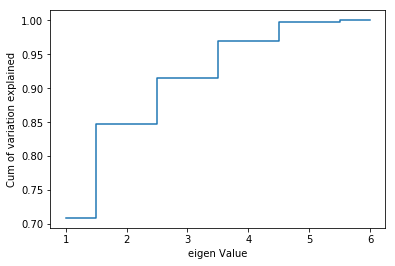

In [268]:
plt.step(list(range(1,len(data_ipl_scaled.columns)+1)),np.cumsum(pca_ipl.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [269]:
# eigen vectors
print(pca_ipl.components_)

[[ 0.4582608   0.39797313  0.3253838   0.40574167  0.41733459  0.43237178]
 [ 0.26643209 -0.33111756 -0.69780334  0.47355804 -0.17902455  0.27593225]
 [-0.10977942  0.00550486 -0.45013448 -0.50823538  0.66942589  0.28082541]
 [-0.00520142  0.84736307 -0.43275029 -0.03252305 -0.24878157 -0.17811777]
 [ 0.45840889 -0.10122837 -0.11890348  0.09676885  0.39458014 -0.77486668]
 [ 0.70483594 -0.0606373   0.05624934 -0.58514214 -0.35786211  0.16096217]]


In [270]:
# Calculating score based on method given in reference document

# using first 4 components that explains > 95% variance
eigen = np.zeros((4,6))

# multiply eigen value with corresponding eigen vector
for i in range(0,pca_ipl.components_.shape[0]-2):
    eigen[i]=pca_ipl.components_[i]* pca_ipl.explained_variance_[i]
print(eigen) 

[[ 1.97167881e+00  1.71228960e+00  1.39997211e+00  1.74571392e+00
   1.79559275e+00  1.86029064e+00]
 [ 2.22834983e-01 -2.76935772e-01 -5.83619625e-01  3.96068275e-01
  -1.49730211e-01  2.30780610e-01]
 [-4.57404191e-02  2.29364176e-03 -1.87551912e-01 -2.11760086e-01
   2.78921322e-01  1.17008014e-01]
 [-1.71191283e-03  2.78887890e-01 -1.42428693e-01 -1.07041289e-02
  -8.18800914e-02 -5.86229089e-02]]


In [271]:
pca_scores = np.dot(data_ipl_scaled,eigen.T) # calculate scores 

In [272]:
pca_scores[0:5]

array([[ 3.66436385e+01, -2.96554625e-01,  1.53016378e+00,
        -3.27895721e-01],
       [ 1.98705243e+01,  1.23508804e+00, -2.09841391e-01,
        -1.95662431e-01],
       [ 1.78221389e+01,  3.94295253e-01, -2.32163102e-01,
        -3.62426402e-01],
       [ 1.67773160e+01,  3.49731421e-02,  1.09223670e-01,
        -7.50681893e-02],
       [ 1.77267138e+01,  1.17175151e+00, -4.86003308e-02,
        -4.84195609e-03]])

In [273]:
# create new dataframe with pca scores for first 4 components only (> 95% explained variance)
pca_sc = pd.DataFrame(pca_scores,columns=['score_pc1','score_pc2','score_pc3','score_pc4'])
pca_sc.shape

(90, 4)

In [274]:
pca_comp = pd.DataFrame(x_pca[:,0:4],columns=['pc1','pc2','pc3','pc4']) # dataframe with top 4 components from PCA output
pca_comp.shape

(90, 4)

In [276]:
# reset index of the datasets before concatenation
data_ipl.reset_index(drop = True,inplace=True)
pca_sc.reset_index(drop = True,inplace=True)

# Concatenate Name, score and pc from PCA 
data_ipl_score = pd.concat([data_ipl[['Name']],pca_sc,pca_comp],axis=1) #concatenate score with name

In [278]:
data_ipl_score['Total_Score']= data_ipl_score['score_pc1']+data_ipl_score['score_pc2']+data_ipl_score['score_pc3']+data_ipl_score['score_pc4']

In [284]:
data_ipl_score['Rank']=data_ipl_score['Total_Score'].rank(method='min',ascending=False) # rank players based on 'Total_Score'
data_ipl_score.sort_values(by='Rank',ascending=True)

Name  score_pc1  score_pc2  score_pc3  score_pc4       pc1  \
0          CH Gayle  36.643639  -0.296555   1.530164  -0.327896  8.516774   
1         G Gambhir  19.870524   1.235088  -0.209841  -0.195662  4.618340   
4          S Dhawan  17.726714   1.171752  -0.048600  -0.004842  4.120072   
5         AM Rahane  17.315241   1.693712  -0.519033   0.056253  4.024436   
2          V Sehwag  17.822139   0.394295  -0.232163  -0.362426  4.142251   
3          CL White  16.777316   0.034973   0.109224  -0.075068  3.899411   
7         RG Sharma  12.559138   0.788709   0.260494  -0.172806  2.919015   
6      KP Pietersen  12.388180  -1.249828   0.289408   0.382848  2.879281   
12     F du Plessis   9.143584   0.086634   0.192170  -0.065774  2.125167   
19         R Dravid   7.893079   1.665222  -0.644458   0.105314  1.834522   
8    AB de Villiers  10.013649  -0.948065  -0.055284  -0.086962  2.327389   
9         JP Duminy   8.956320  -1.470281   0.193341   1.050143  2.081642   
13          OA Shah   8.342049  -0.240310   0.224825   0.031925  1.938872   
18    Mandeep Singh   7.726411   1.009335  -0.513984  -0.043023  1.795785   
15        DJ Hussey   7.818256  -0.047638   0.144727  -0.026881  1.817132   
16         SK Raina   8.045272   0.035103  -0.019881  -0.199159  1.869895   
10        DA Warner   8.963369  -0.977723  -0.122160  -0.163348  2.083281   
11        SR Watson   7.645343  -0.980773  -0.066349   0.069589  1.776943   
14         DJ Bravo   7.433199  -1.147939   0.138728   0.228130  1.727636   
24       RV Uthappa   5.964790   0.754294  -0.140409  -0.013863  1.386346   
17        AT Rayudu   6.235724  -0.390635   0.131263   0.077663  1.449317   
21          M Vijay   5.512021   0.510583  -0.195225  -0.084689  1.281113   
32        JH Kallis   4.717371   0.979121   0.002271   0.029054  1.096419   
25         SE Marsh   5.081698   0.615814  -0.253033   0.078324  1.181097   
27  DMD Jayawardene   4.489952   1.069159  -0.263212   0.076383  1.043562   
23       TM Dilshan   4.447725   0.736331  -0.073499   0.238552  1.033747   
28          V Kohli   4.428023   0.731708  -0.047118   0.059623  1.029168   
22        SPD Smith   5.321039  -0.702235  -0.082466   0.190674  1.236725   
30     SR Tendulkar   3.786118   0.814291  -0.310840   0.120303  0.879976   
33         MS Dhoni   3.700735  -0.037343  -0.157167   0.033769  0.860131   
..              ...        ...        ...        ...        ...       ...   
69          N Saini  -5.878478   0.622447  -0.049439  -0.012685 -1.366285   
65  Y Venugopal Rao  -5.478844  -0.114123   0.120132   0.107732 -1.273402   
47        JA Morkel  -3.611485  -1.408932  -0.218914  -0.357096 -0.839387   
63          RE Levi  -5.505888  -0.034054   0.070633  -0.139966 -1.279688   
55        STR Binny  -4.533732  -0.856004  -0.186182  -0.040553 -1.053737   
62  Harbhajan Singh  -5.057162  -0.510925  -0.263603  -0.264369 -1.175394   
70       MN Samuels  -6.464854   0.035835   0.166236   0.044050 -1.502572   
66       AD Mathews  -5.813588  -0.414700   0.022562  -0.037118 -1.351204   
67        PP Chawla  -6.099931  -0.318634  -0.046825  -0.157524 -1.417756   
68  Shakib Al Hasan  -6.445617  -0.495760  -0.058277  -0.121025 -1.498101   
71        MJ Clarke  -7.357651   0.156944  -0.093965   0.043263 -1.710077   
64        LR Shukla  -6.235908  -0.763876  -0.026503  -0.246960 -1.449360   
73    R Vinay Kumar  -8.272987  -0.220929   0.058164  -0.060112 -1.922821   
75          J Botha  -8.539805  -0.154253   0.031318  -0.018091 -1.984835   
78       SP Goswami  -8.751762  -0.014510   0.063200  -0.005866 -2.034099   
79       SL Malinga  -9.017698   0.003057   0.130346  -0.126624 -2.095908   
72         R Bhatia  -8.368999  -0.546981  -0.137763  -0.172587 -1.945136   
74          P Kumar  -8.853736  -0.407466  -0.010248  -0.131071 -2.057800   
82          B Kumar  -9.582179   0.046260   0.060361   0.013108 -2.227106   
76   A Ashish Reddy  -8.875372  -0.423407  -0.055775  -0.215989 -2.062828   
80      RJ 

In [289]:
#  use first component from  PCA() to rank players and compare above method vs. this
data_ipl_score[['Name','pc1']].sort_values(by='pc1',ascending = False).head(10)

Name       pc1
0         CH Gayle  8.516774
1        G Gambhir  4.618340
2         V Sehwag  4.142251
4         S Dhawan  4.120072
5        AM Rahane  4.024436
3         CL White  3.899411
7        RG Sharma  2.919015
6     KP Pietersen  2.879281
8   AB de Villiers  2.327389
12    F du Plessis  2.125167

##### Since first component explains > 70% of variance, sorting on that component gives more or less similar results

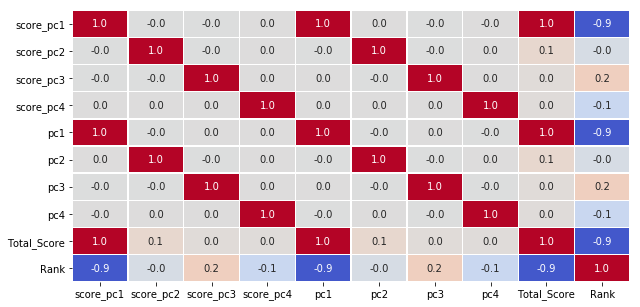

In [596]:
# check correlation between attributes
corr = data_ipl_score.corr()
plt.subplots(1,1,figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='coolwarm', vmin=-1, vmax=1, fmt='.1f',linewidths=.5,center=0,cbar=False)

##### Correlation matrix illustrates that either using score_pc1 or just pc1 (output from PCA()) is good to rank players

<b> Summary: </b>

1. PCA has helped in ranking players by condensing multiple attributes into a single score
2. Final ranking are the players that you would expect based on EDA
3. Ranking players based on first component alone gives similar results

# PART - FIVE

1. List down all possible dimensionality reduction techniques that can be implemented using python.

1. <b> Principal Component Analysis: </b>  sklearn.decomposition.PCA
2. <b>Truncated Singluar Value Decomposition:</b> sklearn.decomposition.TruncatedSVD . (works well with sparse matrices)
3. <b>Factor Analysis:</b>  sklearn.decomposition.FactorAnalysis 
4. <b>Incremental PCA:</b>  sklearn.decomposition.IncrementalPCA (Depending on the size of the input data, this algorithm can be much more memory efficient than a PCA)
5. <b>KernelPCA:</b> sklearn.decomposition.KernelPCA - This is for non-linear decomposition, while PCA is for linear
6. <b>Isomap:</b> sklearn.manifold.Isomap - Non-linear dimensionality reduction through Isometric Mapping
7. <b>Locally Linear embedding :</b> sklearn.manifold.LocallyLinearEmbedding  - seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods
8. <b>Spectral Embedding:</b> sklearn.manifold.SpectralEmbedding - applies spectral decomposition

2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and
text data ? Please illustrate your findings using a simple implementation on python.

It is  possible to do dimension reduction on text and multimedia data.

In [1]:
# all imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix

# Imports PIL module 
from PIL import Image

In [2]:
# Retrieve image file from web and save locally.
urllib.request.urlretrieve(
  'https://static1.bigstockphoto.com/0/6/3/large1500/360922870.jpg',"USFlag.jpg")

# open method used to open different extension image file
im = Image.open("USFlag.jpg") 
  
# This method will show image in any image viewer 
im.show()

In [3]:
im_mat  = np.array(im) # convert to image data to 3-d matrix 
im_mat.shape

(910, 1500, 3)

In [4]:
# flatten image data (R,G,B) (3rd dimension is flattened into 2nd dimension)
im_mat_flat = np.array(im_mat).reshape((800, 1200*3))
im_mat_flat.shape

ValueError: cannot reshape array of size 4095000 into shape (800,3600)

In [466]:
# Using existing Sign-Language-Digits-Dataset available online to proceed further 
#[Source: Kaggle https://www.kaggle.com/hamishdickson/preprocessing-images-with-dimensionality-reduction]
X = np.load('X.npy') 
Y = np.load('Y.npy')
X.shape,Y.shape

((2062, 64, 64), (2062, 10))

In [467]:
# X is 3 dimensional. We need to flatten it to 2 dimensions
X_flat = np.array(X).reshape((2062, 64*64))
X_flat.shape

(2062, 4096)

In [471]:
X_flat[:5]

array([[0.46666667, 0.4745098 , 0.47843137, ..., 0.5294118 , 0.52156866,
        0.50980395],
       [0.59607846, 0.60784316, 0.61960787, ..., 0.3882353 , 0.38039216,
        0.37254903],
       [0.5882353 , 0.6039216 , 0.61960787, ..., 0.40392157, 0.4       ,
        0.3882353 ],
       [0.5568628 , 0.5686275 , 0.58431375, ..., 0.3764706 , 0.37254903,
        0.36862746],
       [0.5803922 , 0.5764706 , 0.5921569 , ..., 0.4509804 , 0.44313726,
        0.43529412]], dtype=float32)

In [483]:
labels = pd.DataFrame(Y)
print(labels.sum(axis=0))
print(labels.sum(axis=0).sum())

0    204.0
1    205.0
2    206.0
3    207.0
4    206.0
5    208.0
6    207.0
7    206.0
8    206.0
9    207.0
dtype: float64
2062.0


In [489]:
#Y has only 1 value per row. We need to create a single column for classification
labels['labels']= labels.idxmax(axis="columns")
labels.sample(10)

0    1    2    3    4    5    6    7    8    9  labels
482   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       2
659   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0       3
1031  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0       5
1361  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0       6
2050  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0       9
759   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0       3
204   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       1
355   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       1
868   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0       4
2011  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0       9

In [490]:
labels = labels[['labels']] # drop all other columns

In [491]:
#concatenate X with class label
p_data =pd.concat([pd.DataFrame(X_flat),labels],axis=1) #concatenate inputs with labels to create a single dataset
p_data.shape

(2062, 4097)

In [492]:
p_data.sample(10) 

0         1         2         3         4         5         6  \
817   0.470588  0.486275  0.498039  0.509804  0.525490  0.541176  0.552941   
28    0.513726  0.529412  0.541176  0.552941  0.564706  0.576471  0.588235   
964   0.521569  0.533333  0.541176  0.549020  0.564706  0.572549  0.580392   
493   0.482353  0.490196  0.498039  0.505882  0.521569  0.525490  0.525490   
521   0.592157  0.607843  0.615686  0.631373  0.643137  0.650980  0.654902   
1020  0.486275  0.498039  0.501961  0.505882  0.509804  0.517647  0.533333   
1490  0.384314  0.380392  0.396078  0.450980  0.462745  0.466667  0.482353   
1156  0.545098  0.592157  0.607843  0.615686  0.631373  0.643137  0.650980   
1810  0.403922  0.411765  0.423529  0.439216  0.454902  0.474510  0.486275   
618   0.509804  0.525490  0.541176  0.552941  0.568627  0.576471  0.584314   

             7         8         9  ...      4087      4088      4089  \
817   0.560784  0.576471  0.596078  ...  0.447059  0.439216  0.431373   
28    0.600000  0.611765  0.619608  ...  0.529412  0.521569  0.513726   
964   0.588235  0.592157  0.596078  ...  0.603922  0.600000  0.588235   
493   0.529412  0.537255  0.541176  ...  0.447059  0.435294  0.423529   
521   0.658824  0.670588  0.670588  ...  0.498039  0.486275  0.474510   
1020  0.541176  0.552941  0.560784  ...  0.521569  0.509804  0.505882   
1490  0.494118  0.505882  0.513726  ...  0.662745  0.647059  0.635294   
1156  0.658824  0.674510  0.686275  ...  0.454902  0.443137  0.435294   
1810  0.501961  0.509804  0.525490  ...  0.639216  0.619608  0.615686   
618   0.588235  0.603922  0.615686  ...  0.458824  0.447059  0.435294   

          4090      4091      4092      4093      4094      4095  labels  
817   0.427451  0.423529  0.411765  0.403922  0.400000  0.388235       3  
28    0.509804  0.498039  0.486275  0.474510  0.466667  0.454902       0  
964   0.580392  0.572549  0.564706  0.552941  0.537255  0.509804       4  
493   0.415686  0.415686  0.400000  0.388235  0.384314  0.372549       2  
521   0.458824  0.447059  0.435294  0.423529  0.411765  0.400000       2  
1020  0.498039  0.490196  0.486275  0.482353  0.474510  0.466667       4  
1490  0.619608  0.603922  0.592157  0.580392  0.564706  0.552941       7  
1156  0.423529  0.415686  0.403922  0.392157  0.384314  0.372549       5  
1810  0.600000  0.584314  0.576471  0.580392  0.572549  0.560784       8  
618   0.419608  0.407843  0.396078  0.380392  0.372549  0.364706       3  

[10 rows x 4097 columns]

In [509]:
# now we have the image data with labels
# Tune SVM
# dependent variable
y = p_data['labels']

# independent variable
x = p_data.iloc[:,:-1]

# Perform train_test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10,stratify=y)
print("Training Class splits\n Total:",len(y_train),Counter(y_train))
print("Testing Class splits\n Total:",len(y_test),Counter(y_test))
print("Input data Class splits\n Total:",len(y),Counter(y))

Training Class splits
 Total: 1443 Counter({5: 146, 9: 145, 3: 145, 6: 145, 7: 144, 2: 144, 8: 144, 4: 144, 1: 143, 0: 143})
Testing Class splits
 Total: 619 Counter({3: 62, 2: 62, 5: 62, 1: 62, 6: 62, 8: 62, 9: 62, 4: 62, 7: 62, 0: 61})
Input data Class splits
 Total: 2062 Counter({5: 208, 3: 207, 6: 207, 9: 207, 2: 206, 4: 206, 7: 206, 8: 206, 1: 205, 0: 204})


In [496]:
#scale input variables
scale = StandardScaler()

# fit with train data
xs_train = pd.DataFrame(scale.fit_transform(x_train), columns=x_train.columns)

# apply mean and std.dev of train data to test data using transform
xs_test = pd.DataFrame(scale.transform(x_test), columns=x_train.columns)

In [497]:
#tuning SVM for scaled data
# #SVM
C=np.logspace(-3, 2, 6)
gamma =np.logspace(-3, 2, 6)
kernel = ['linear','rbf']
param_grid = dict(C=C, gamma=gamma, kernel = kernel) 
sv = svm.SVC(class_weight = 'balanced',random_state=1)
param_grid = dict(C=C, gamma=gamma, kernel = kernel)    # define parameter grid based on these parameters
sv_grid = GridSearchCV(sv,param_grid, cv=5, scoring='accuracy',n_jobs=-1) # finding best parameters using gridsearch
sv_grid.fit(xs_train, y_train) # fit the model

#find best parameters
print(sv_grid.best_score_)
print(sv_grid.best_params_)

0.7914023452518262
{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}


In [500]:
# Fit SVM model  using scaled data on the optimal parameters found using gridsearch
start_time = time.time()
model = svm.SVC(C=.001,gamma=0.001,kernel='linear',class_weight = 'balanced',random_state=1)
model.fit(xs_train, y_train)
y_pred = model.predict(xs_test)
print(classification_report(y_test,y_pred))
end_time = time.time()
total_time = end_time - start_time
print("total time taken:",total_time)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        61
           1       0.88      0.85      0.87        62
           2       0.79      0.79      0.79        62
           3       0.76      0.77      0.77        62
           4       0.84      0.92      0.88        62
           5       0.74      0.81      0.77        62
           6       0.71      0.56      0.63        62
           7       0.89      0.87      0.88        62
           8       0.85      0.84      0.85        62
           9       0.91      0.94      0.92        62

    accuracy                           0.82       619
   macro avg       0.82      0.82      0.82       619
weighted avg       0.82      0.82      0.82       619

total time taken: 5.58599591255188


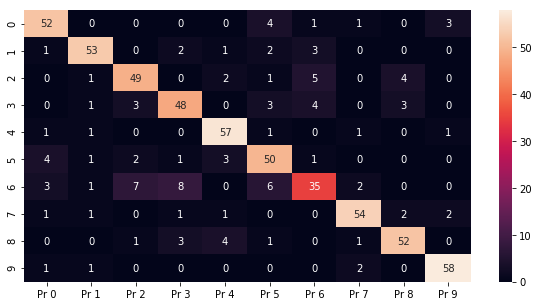

In [502]:
lab= list(range(0,10))
plab=["Pr "+str(s) for s in lab]
cm=confusion_matrix(y_test,y_pred,labels=lab)
df_cm = pd.DataFrame(cm, index = [i for i in lab],
                  columns = [i for i in plab])
plt.figure(figsize = (10,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

##### Prediction for 6 is lowest, while 9 is highest. Test accuracy is 82% using SVM

In [511]:
# calculate PCA
covMatrix = np.cov(xs_train,rowvar=False) # Build covariance matrix (square and symmetric)
print("Shape of covariance matrix:",covMatrix.shape)

pca = PCA(n_components=min(xs_train.shape[1],xs_train.shape[0])) # minimum of rows or columns
x_pca = pca.fit_transform(xs_train)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

Shape of covariance matrix: (4096, 4096)
[1.1831565e+03 2.0112320e+02 1.8099835e+02 ... 4.2591831e-03 4.1471957e-03
 2.2198419e-13]
[2.8865647e-01 4.9068328e-02 4.4158440e-02 ... 1.0391193e-06 1.0117976e-06
 5.4157818e-17]


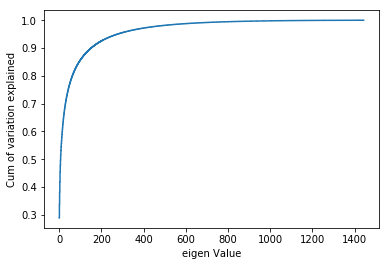

In [513]:
plt.step(list(range(1,min(xs_train.shape[1],xs_train.shape[0])+1)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

##### Top 200 features explain more than 90% of variance

In [516]:
# Fit SVM model  using first 200 pca components
start_time = time.time()
model = svm.SVC(C=.001,gamma=0.001,kernel='linear',class_weight = 'balanced',random_state=1)
model.fit(x_pca[:,0:201], y_train)

#
x_pca_test = pca.transform(xs_test) # transform test data using pca
y_pred = model.predict(x_pca_test[:,0:201])
print(classification_report(y_test,y_pred))
end_time = time.time()
total_time = end_time - start_time
print("total time taken:",total_time)

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        61
           1       0.87      0.85      0.86        62
           2       0.75      0.73      0.74        62
           3       0.72      0.76      0.74        62
           4       0.85      0.92      0.88        62
           5       0.71      0.82      0.76        62
           6       0.68      0.52      0.59        62
           7       0.90      0.87      0.89        62
           8       0.83      0.79      0.81        62
           9       0.88      0.92      0.90        62

    accuracy                           0.80       619
   macro avg       0.80      0.80      0.80       619
weighted avg       0.80      0.80      0.80       619

total time taken: 0.4199991226196289


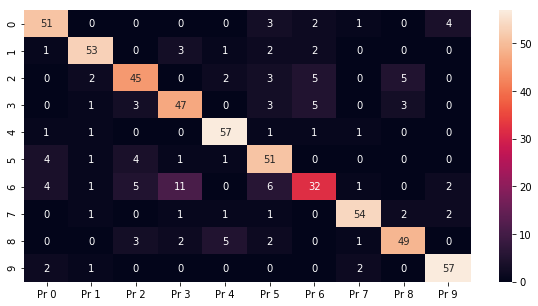

In [517]:
lab= list(range(0,10))
plab=["Pr "+str(s) for s in lab]
cm=confusion_matrix(y_test,y_pred,labels=lab)
df_cm = pd.DataFrame(cm, index = [i for i in lab],
                  columns = [i for i in plab])
plt.figure(figsize = (10,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

##### With 200 features, we are able to predict at 80% test accuracy and much reduced time.
##### Classification table shows similar accuracy results

<b> Summary: </b>
<br>
1. Dimension reduction can be applied on Multimedia files and text files.
2. Input data should be converted into arrays using relevant functions based on multimedia file types
3. Once, input is in array format, PCA and other ML algorithms can be applied to extract information
4. Here, image files are converted into arrays and classification is performed.
5. Reducing input features from 4096 to just top 200 (using PCA) gave similar classificaiton results at a much reduced time